In [1]:
library(readr)
library(tidyverse)
library(lubridate)
library(gridExtra)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.1.1       ✔ purrr   0.3.2  
✔ tibble  2.1.1       ✔ dplyr   0.8.0.1
✔ tidyr   0.8.3       ✔ stringr 1.4.0  
✔ ggplot2 3.1.1       ✔ forcats 0.4.0  
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘lubridate’

The following object is masked from ‘package:base’:

    date


Attaching package: ‘gridExtra’

The following object is masked from ‘package:dplyr’:

    combine



In [2]:
options(warn=-1)

In [3]:
df_1 <- read_csv(url('https://www.gstatic.com/covid19/mobility/Global_Mobility_Report.csv'))



Parsed with column specification:
cols(
  country_region_code = col_character(),
  country_region = col_character(),
  sub_region_1 = col_character(),
  sub_region_2 = col_logical(),
  metro_area = col_logical(),
  iso_3166_2_code = col_character(),
  census_fips_code = col_logical(),
  place_id = col_character(),
  date = col_date(format = ""),
  retail_and_recreation_percent_change_from_baseline = col_double(),
  grocery_and_pharmacy_percent_change_from_baseline = col_double(),
  parks_percent_change_from_baseline = col_double(),
  transit_stations_percent_change_from_baseline = col_double(),
  workplaces_percent_change_from_baseline = col_double(),
  residential_percent_change_from_baseline = col_double()
)


In [4]:
head(df_1)

country_region_code country_region       sub_region_1 sub_region_2 metro_area
1 AE                  United Arab Emirates NA           NA           NA        
2 AE                  United Arab Emirates NA           NA           NA        
3 AE                  United Arab Emirates NA           NA           NA        
4 AE                  United Arab Emirates NA           NA           NA        
5 AE                  United Arab Emirates NA           NA           NA        
6 AE                  United Arab Emirates NA           NA           NA        
  iso_3166_2_code census_fips_code place_id                    date      
1 NA              NA               ChIJvRKrsd9IXj4RpwoIwFYv0zM 2020-02-15
2 NA              NA               ChIJvRKrsd9IXj4RpwoIwFYv0zM 2020-02-16
3 NA              NA               ChIJvRKrsd9IXj4RpwoIwFYv0zM 2020-02-17
4 NA              NA               ChIJvRKrsd9IXj4RpwoIwFYv0zM 2020-02-18
5 NA              NA               ChIJvRKrsd9IXj4RpwoIwFYv0zM 2020-02-19
6 NA              NA               ChIJvRKrsd9IXj4RpwoIwFYv0zM 2020-02-20
  retail_and_recreation_percent_change_from_baseline
1  0                                                
2  1                                                
3 -1                                                
4 -2                                                
5 -2                                                
6 -2                                                
  grocery_and_pharmacy_percent_change_from_baseline
1 4                                                
2 4                                                
3 1                                                
4 1                                                
5 0                                                
6 1                                                
  parks_percent_change_from_baseline
1 5                                 
2 4                                 
3 5                                 
4 5                                 
5 4                                 
6 6                                 
  transit_stations_percent_change_from_baseline
1  0                                           
2  1                                           
3  1                                           
4  0                                           
5 -1                                           
6  1                                           
  workplaces_percent_change_from_baseline
1 2                                      
2 2                                      
3 2                                      
4 2                                      
5 2                                      
6 1                                      
  residential_percent_change_from_baseline
1 1                                       
2 1                                       
3 1                                       
4 1                                       
5 1                                       
6 1

In [5]:
df_1$week <- week(df_1$date)
df_1$month <- month(df_1$date)



In [6]:
categories <- names(df_1)[10:length(names(df_1))]

In [7]:
countries = c('Spain', 'Italy', 'Norway')

In [98]:
plotting_eu_week <- function(countries, feature, dataframe){
    
    plot_list <- list()
    for(i in 1:length(countries)){
        
        df <- dataframe[dataframe$country_region == countries[i],]
        
        week_data <- summarise_at(group_by(df, week), vars(feature), funs(mean(., na.rm=TRUE)))
        plot <- ggplot() +
                geom_line(aes(x=week_data$week, y=(week_data[[feature]])))
        plot_list[[i]] <- ggplotGrob(p)
        
    }
    return(plot_list)
}

In [ ]:
comparison_week <- function(feature){

    final_plot <- ggplot() +
                geom_line(aes(x=plot_spain$week, y=plot_spain[[feature]], color='Spain'), lwd=1.5) +
                geom_line(aes(x=plot_italy$week, y=plot_italy[[feature]], color='Italy'), lwd=1.5) +
                geom_line(aes(x=plot_norway$week, y=plot_norway[[feature]], color='Norway'), lwd=1.5) +
                labs(title=sprintf('Italy, Spain and Norway week comparison on %s', feature), color='Legend', x='Week', y='Precent change') +
                theme(plot.title = element_text(size=25)) +
                theme(axis.title = element_text(size=20)) +
                theme_bw() +
                scale_x_continuous(breaks=1:53, labels=1:53) 
                


    return(final_plot)
}

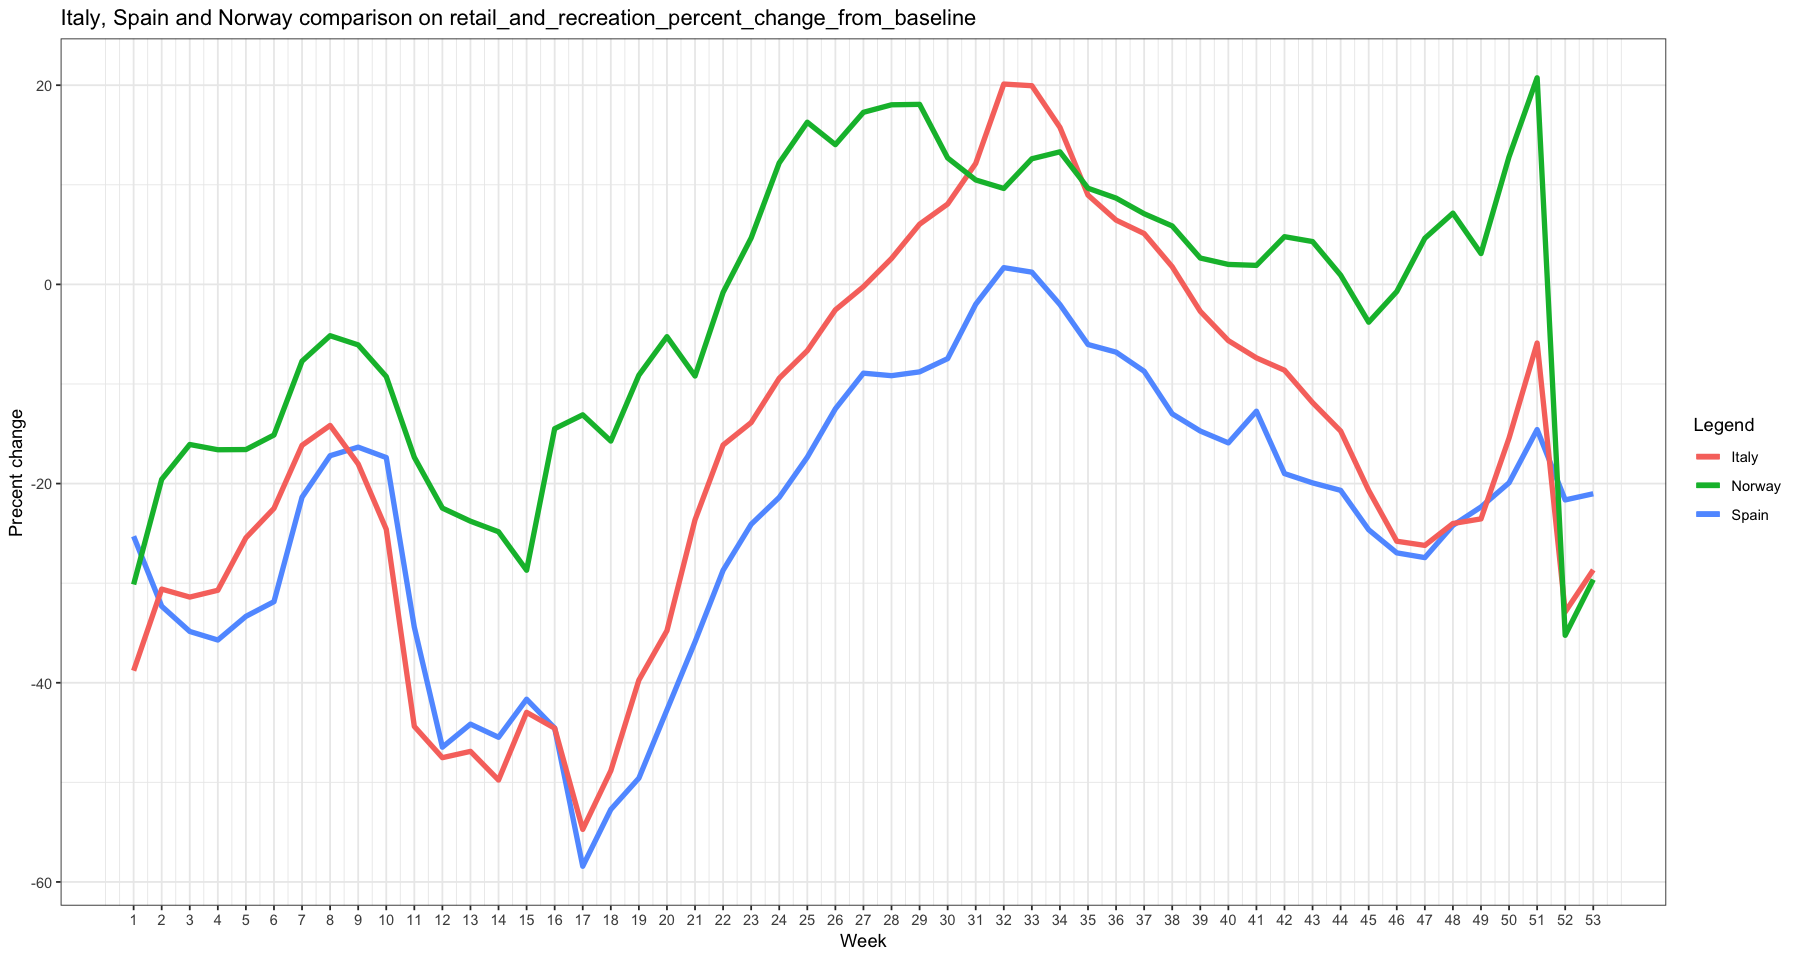

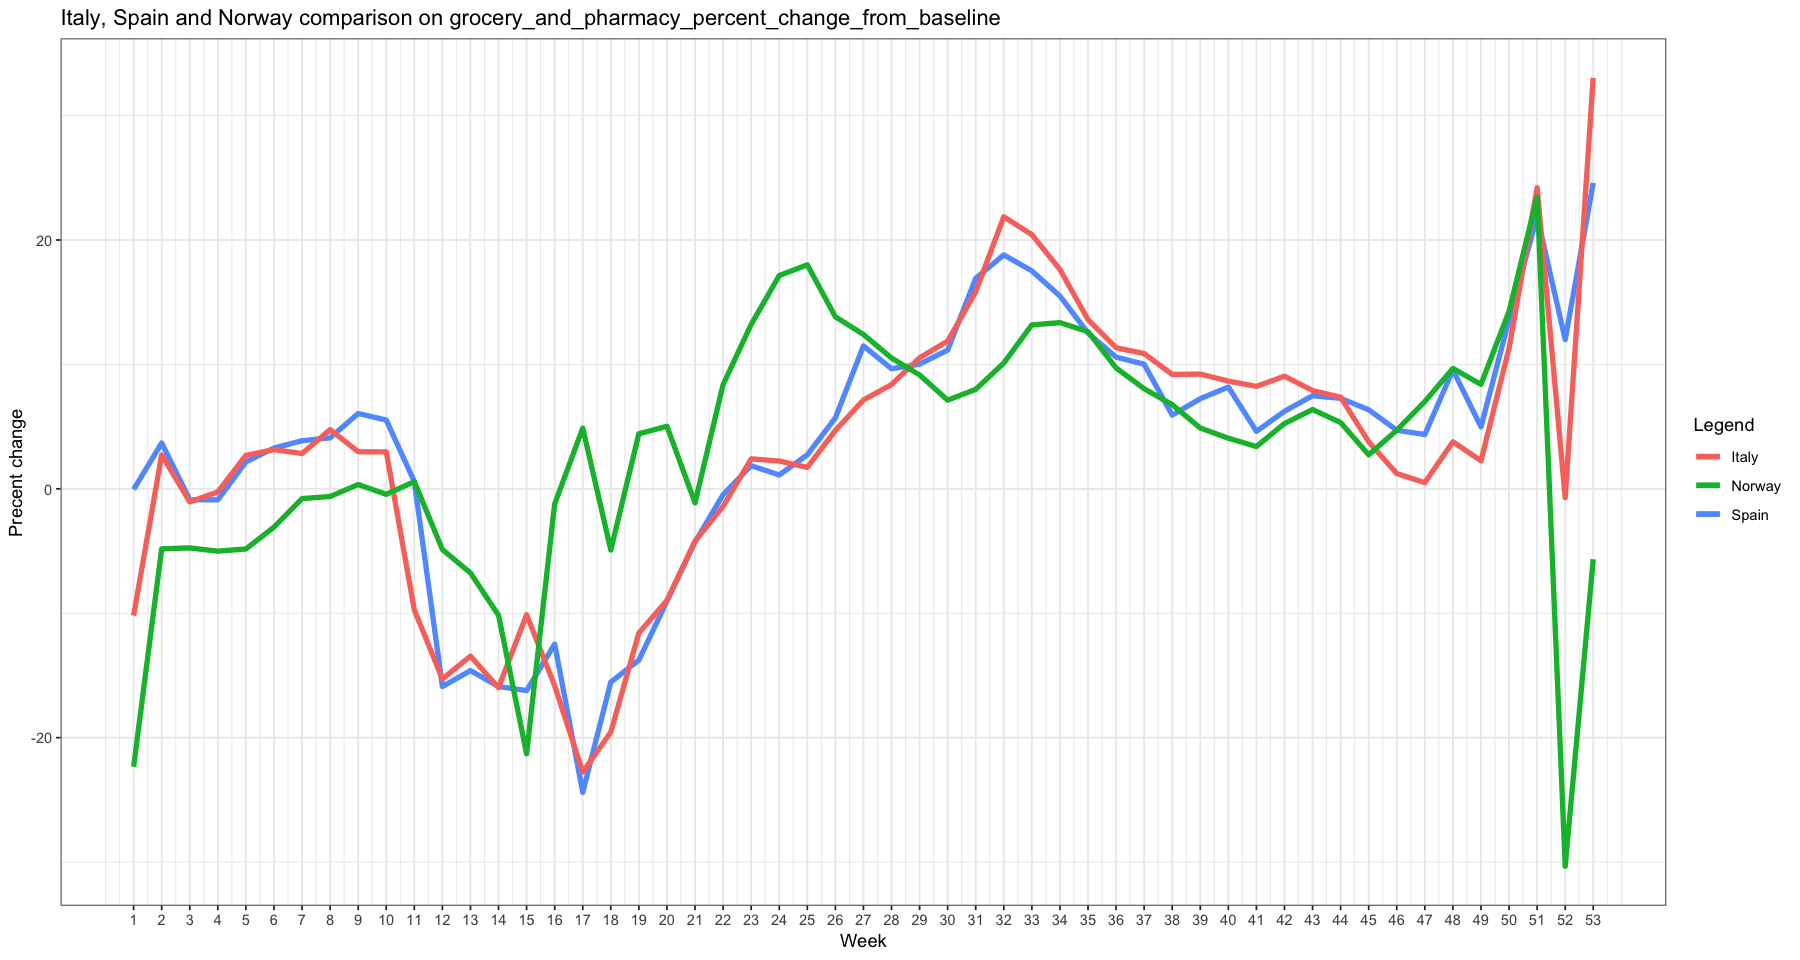

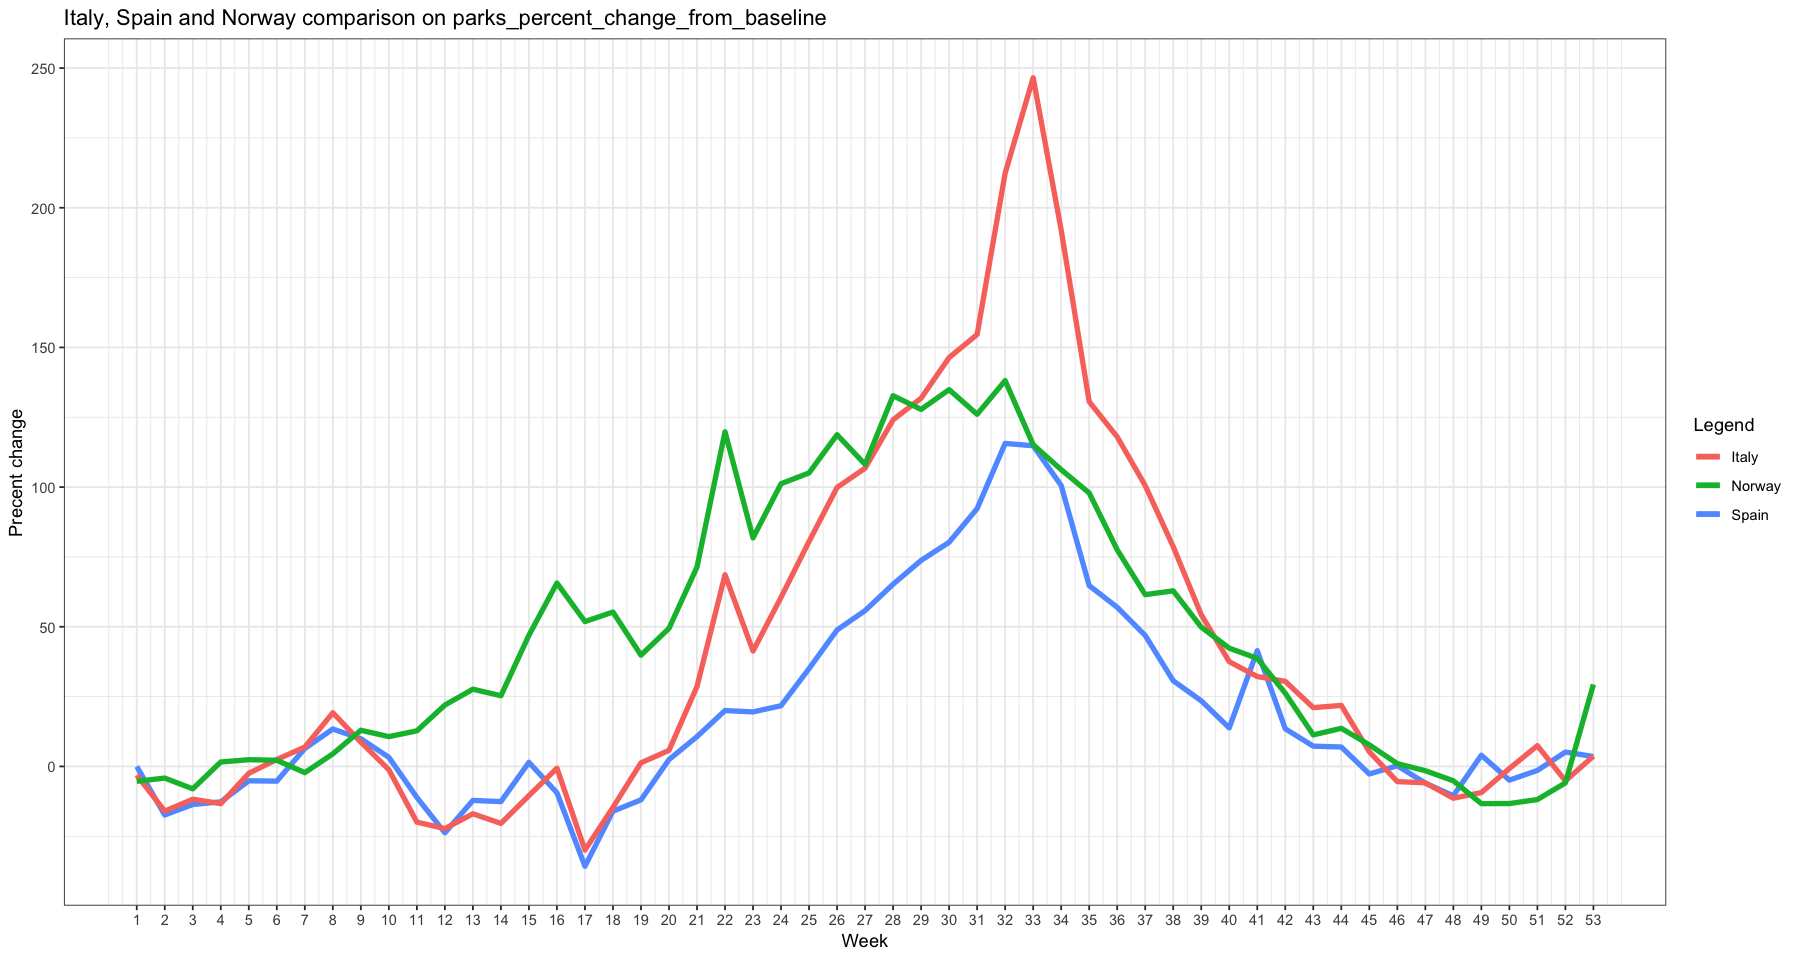

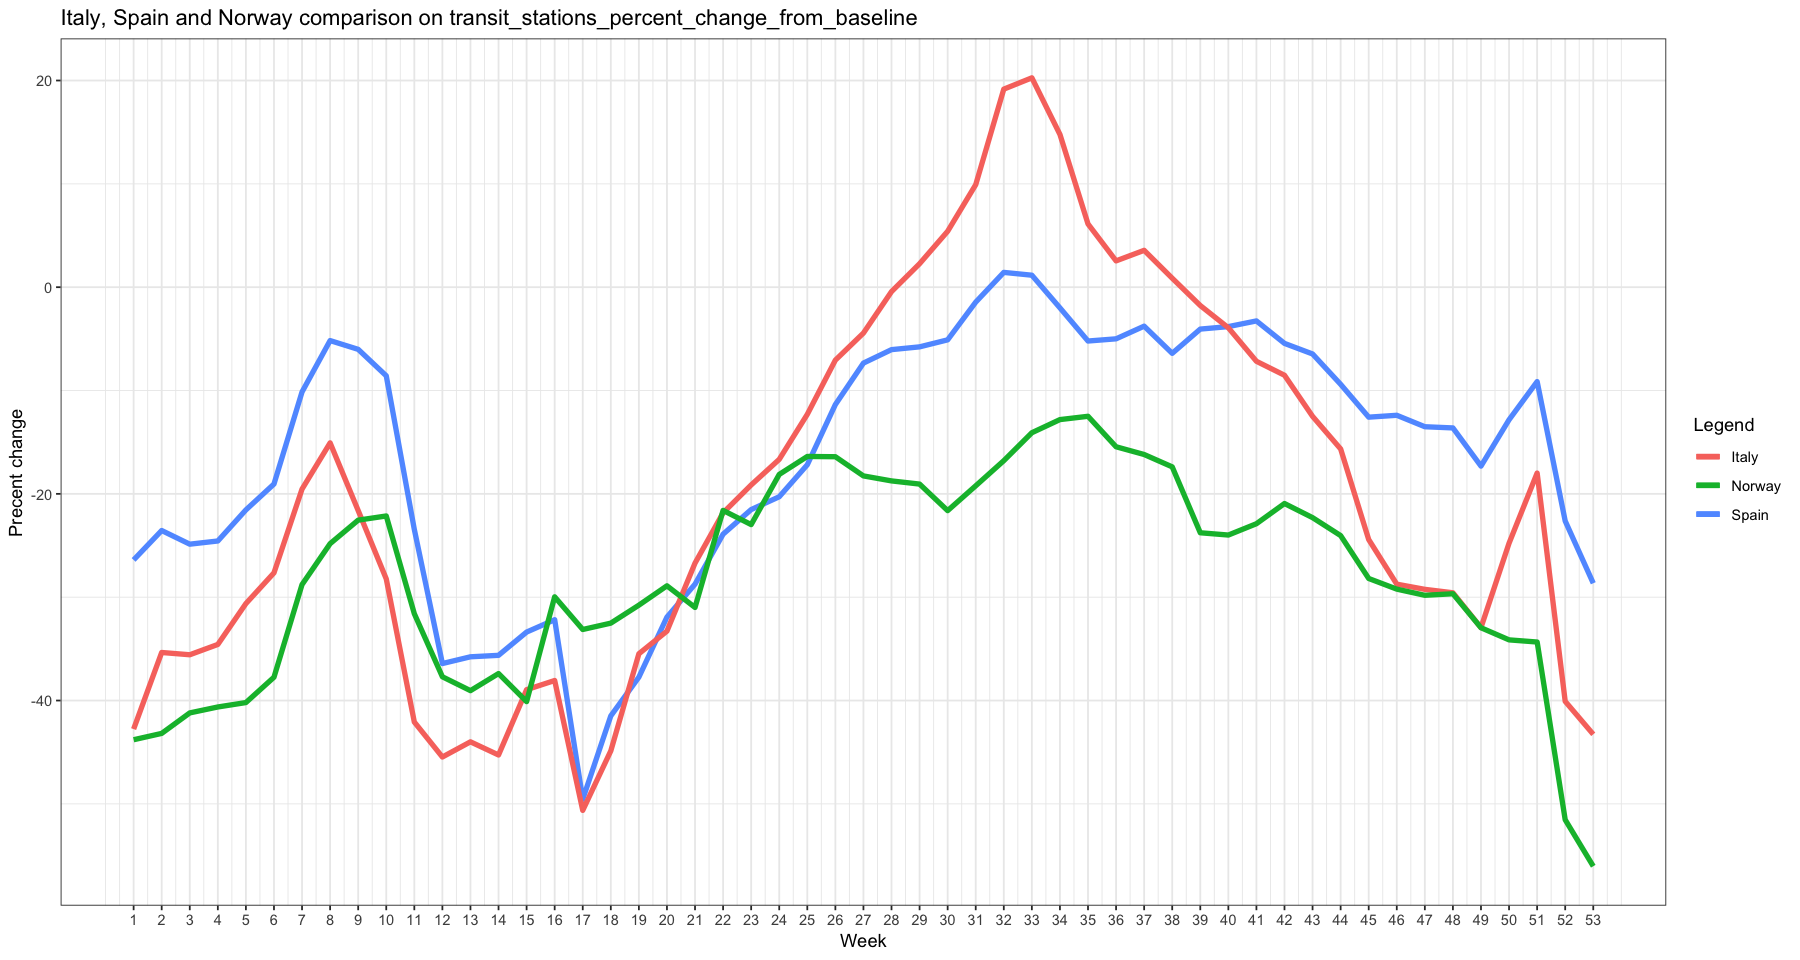

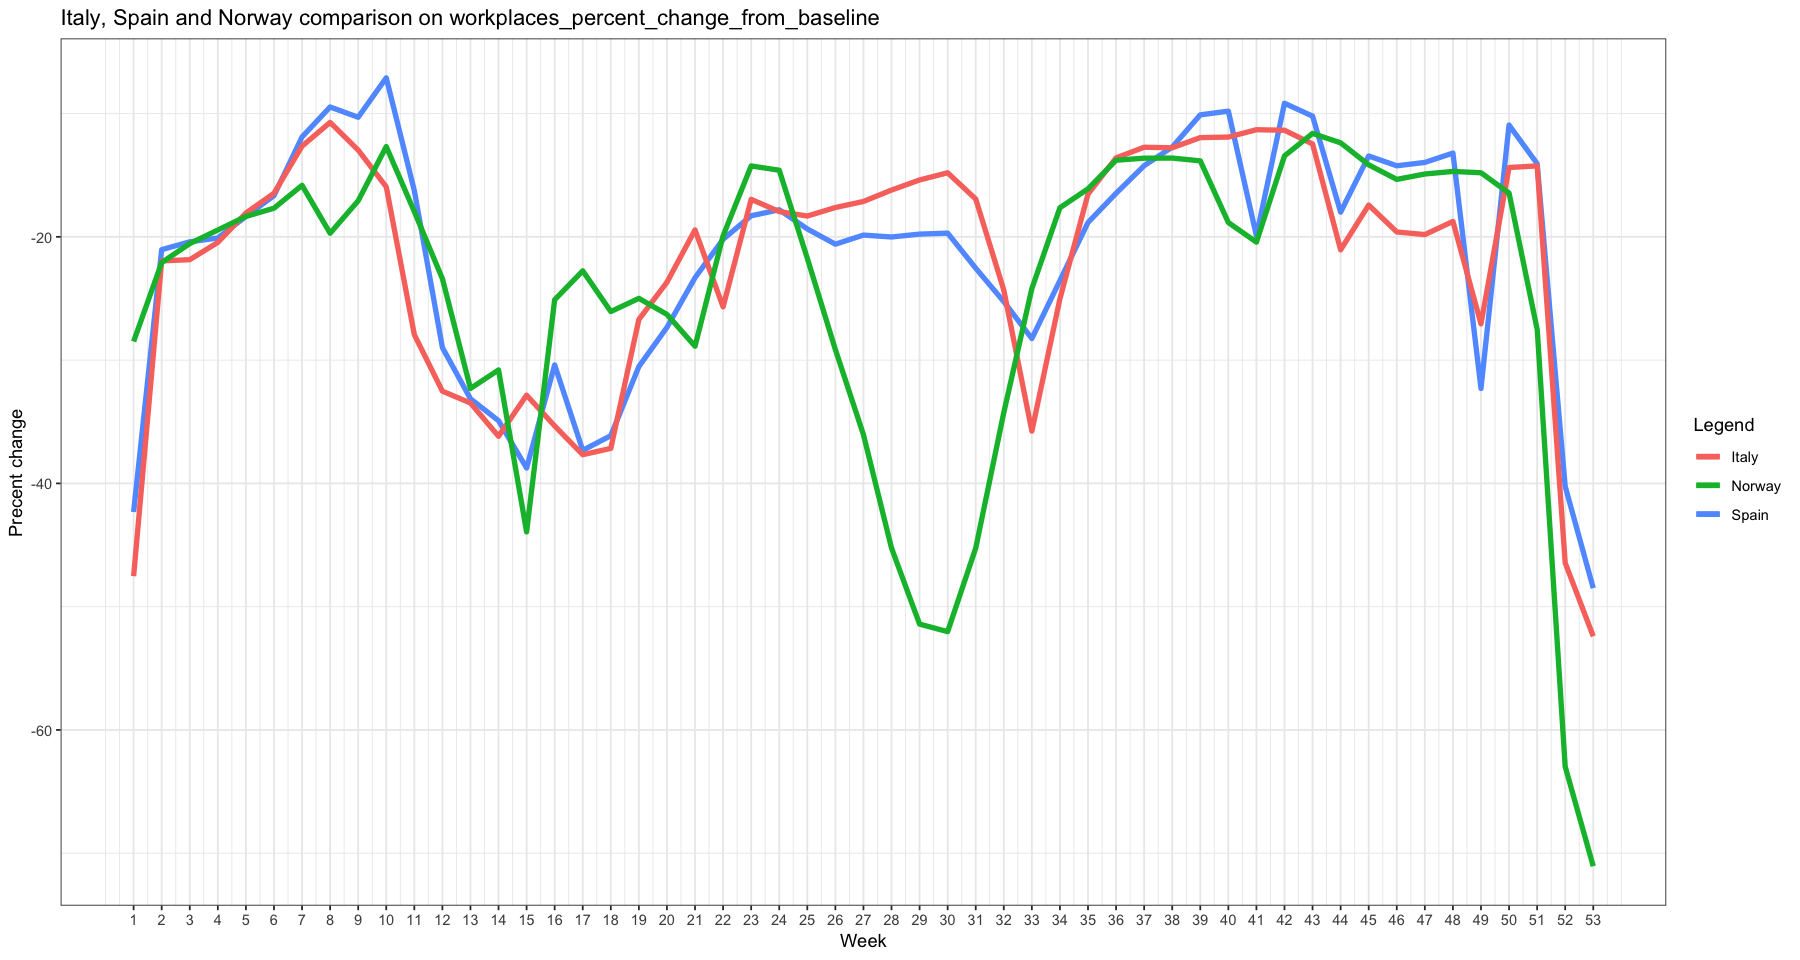

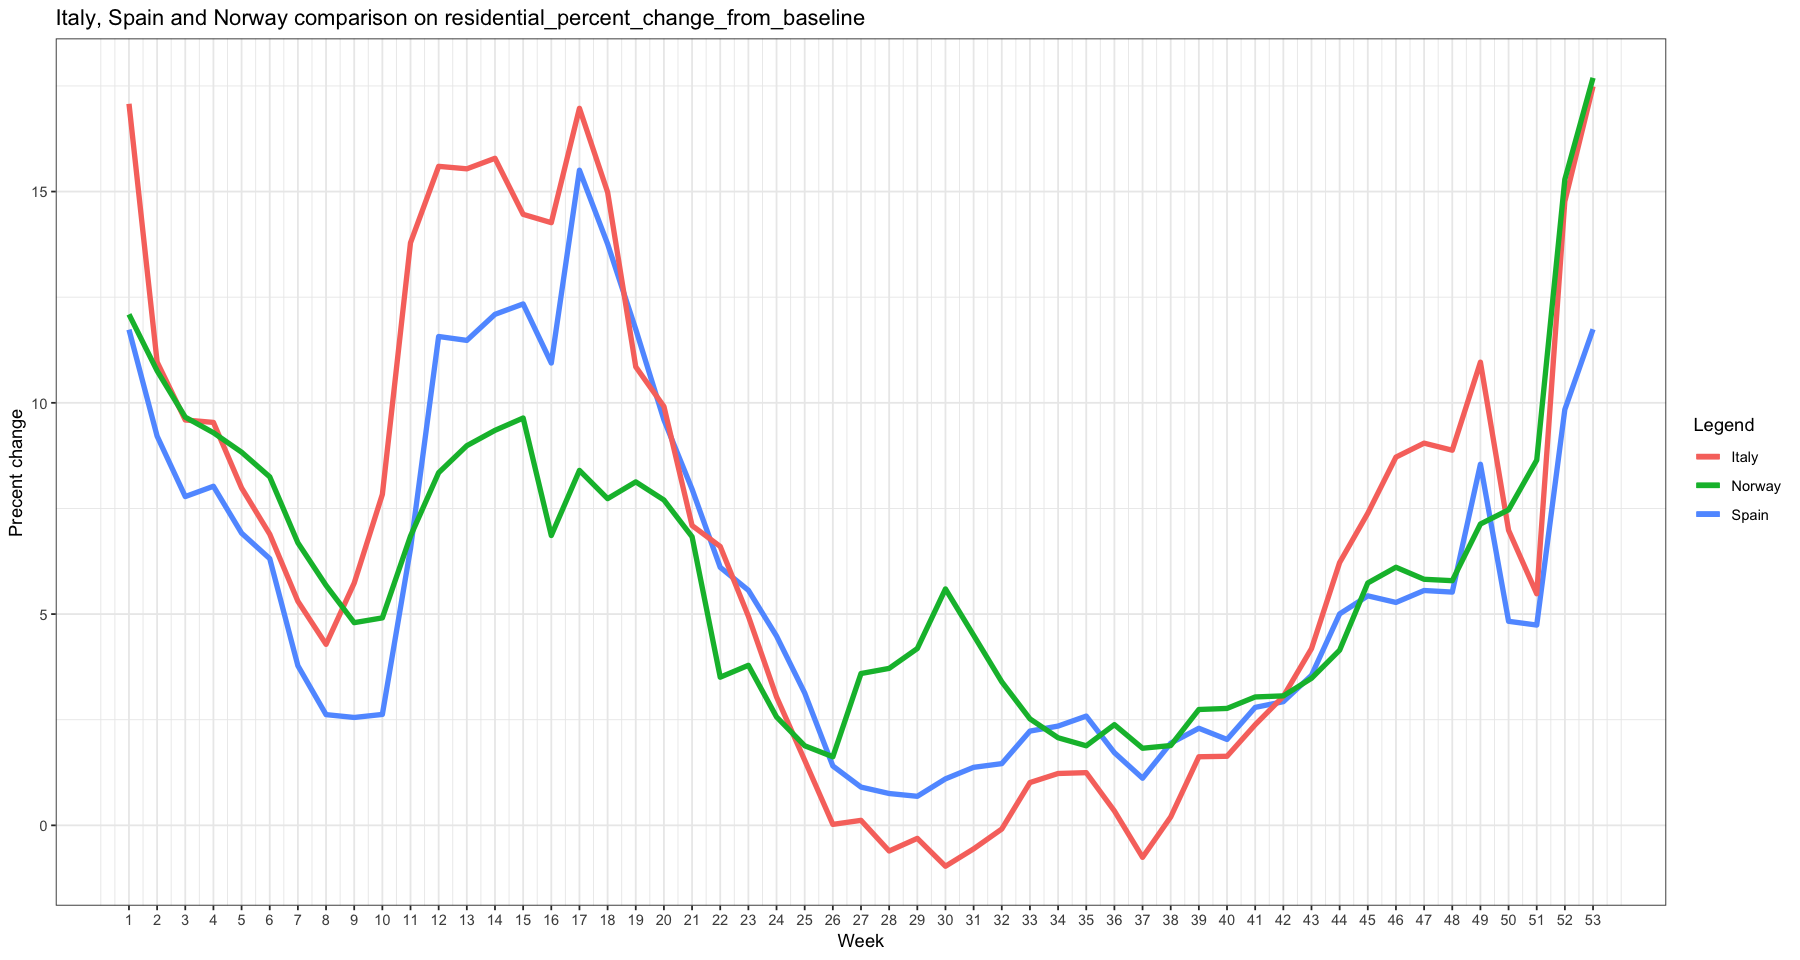

In [231]:
options(repr.plot.width=15, repr.plot.height=8)
df_spain <- df_1[df_1$country_region == 'Spain',]
df_italy <- df_1[df_1$country_region == 'Italy',]
df_norway <- df_1[df_1$country_region == 'Norway',]


for (category in categories){
    plot_italy <- summarise_at(group_by(df_italy, week), vars(category), funs(mean(., na.rm=TRUE)))
    plot_spain <- summarise_at(group_by(df_spain, week), vars(category), funs(mean(., na.rm=TRUE)))
    plot_norway <- summarise_at(group_by(df_norway, week), vars(category), funs(mean(., na.rm=TRUE)))

    print(comparison_week(feature=category))

}

In [235]:

comparison_month <- function(feature){

    final_plot <- ggplot() +
                geom_line(aes(x=plot_spain$month, y=plot_spain[[feature]], color='Spain'), lwd=1.5) +
                geom_line(aes(x=plot_italy$month, y=plot_italy[[feature]], color='Italy'), lwd=1.5) +
                geom_line(aes(x=plot_norway$month, y=plot_norway[[feature]], color='Norway'), lwd=1.5) +
                labs(title=sprintf('Italy, Spain and Norway month comparison on %s', feature), color='Legend', x='Month', y='Precent change') +
                theme(plot.title = element_text(size=25)) +
                theme(axis.title = element_text(size=20)) +
                theme_bw() +
                scale_x_continuous(breaks=1:12, labels=1:12) 
                


    return(final_plot)
}

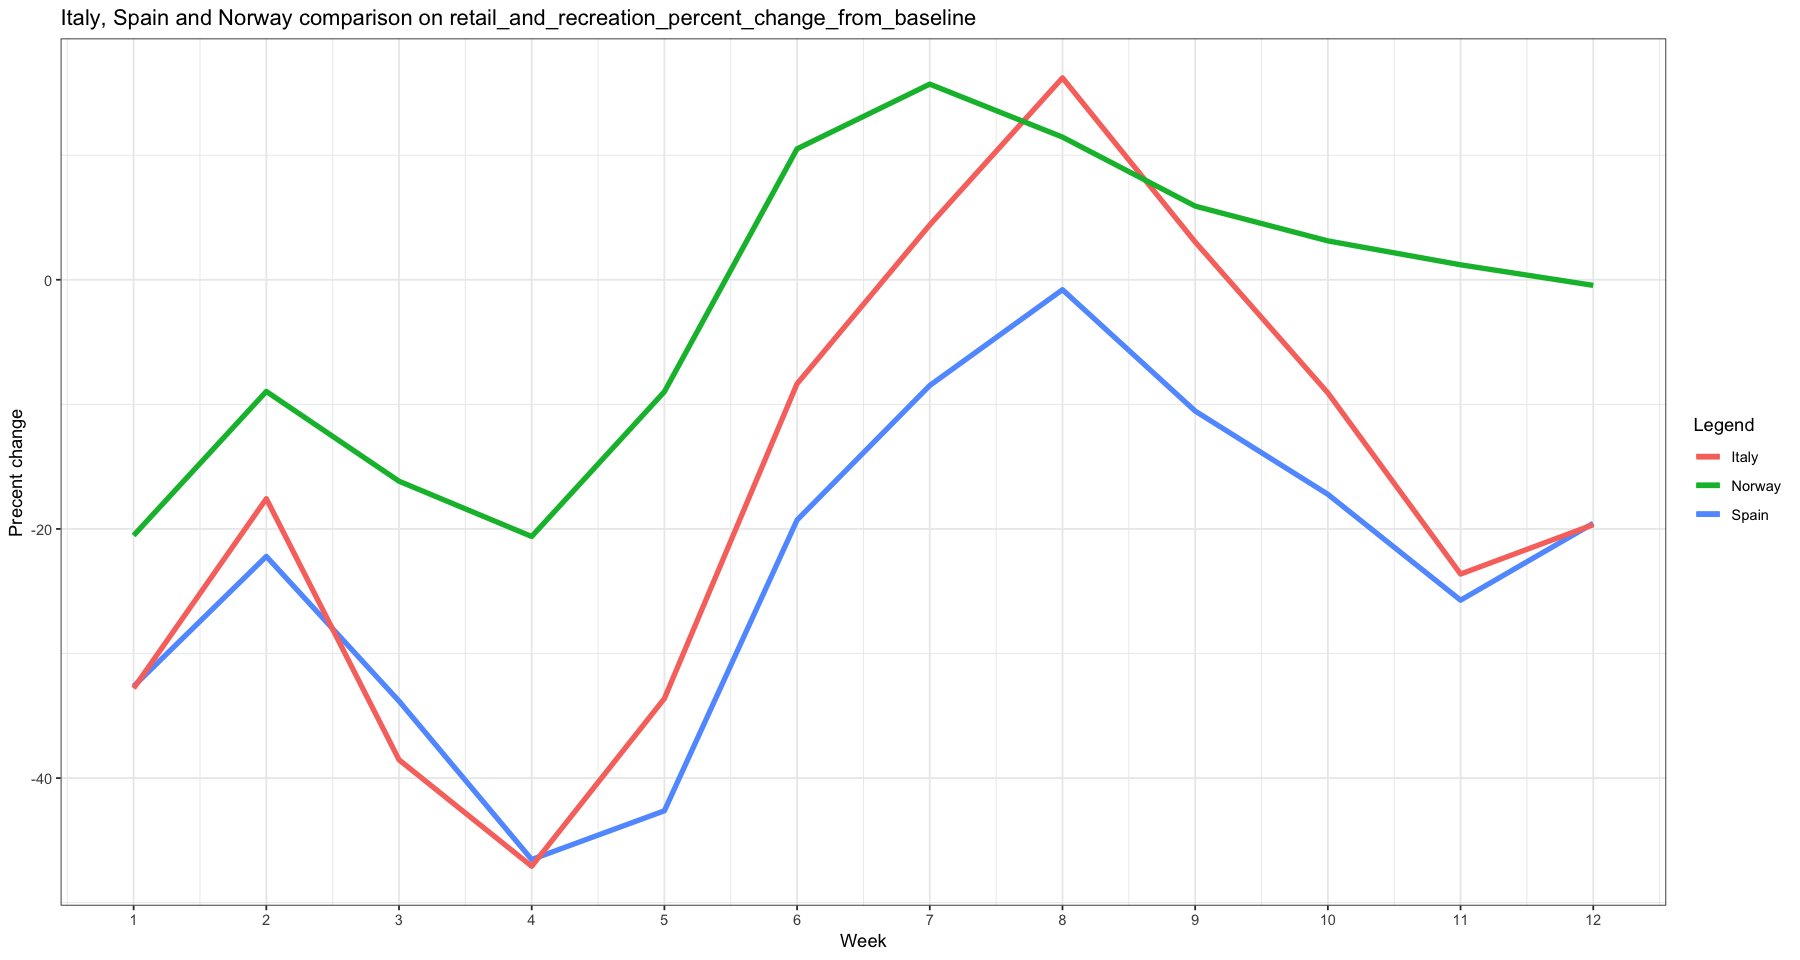

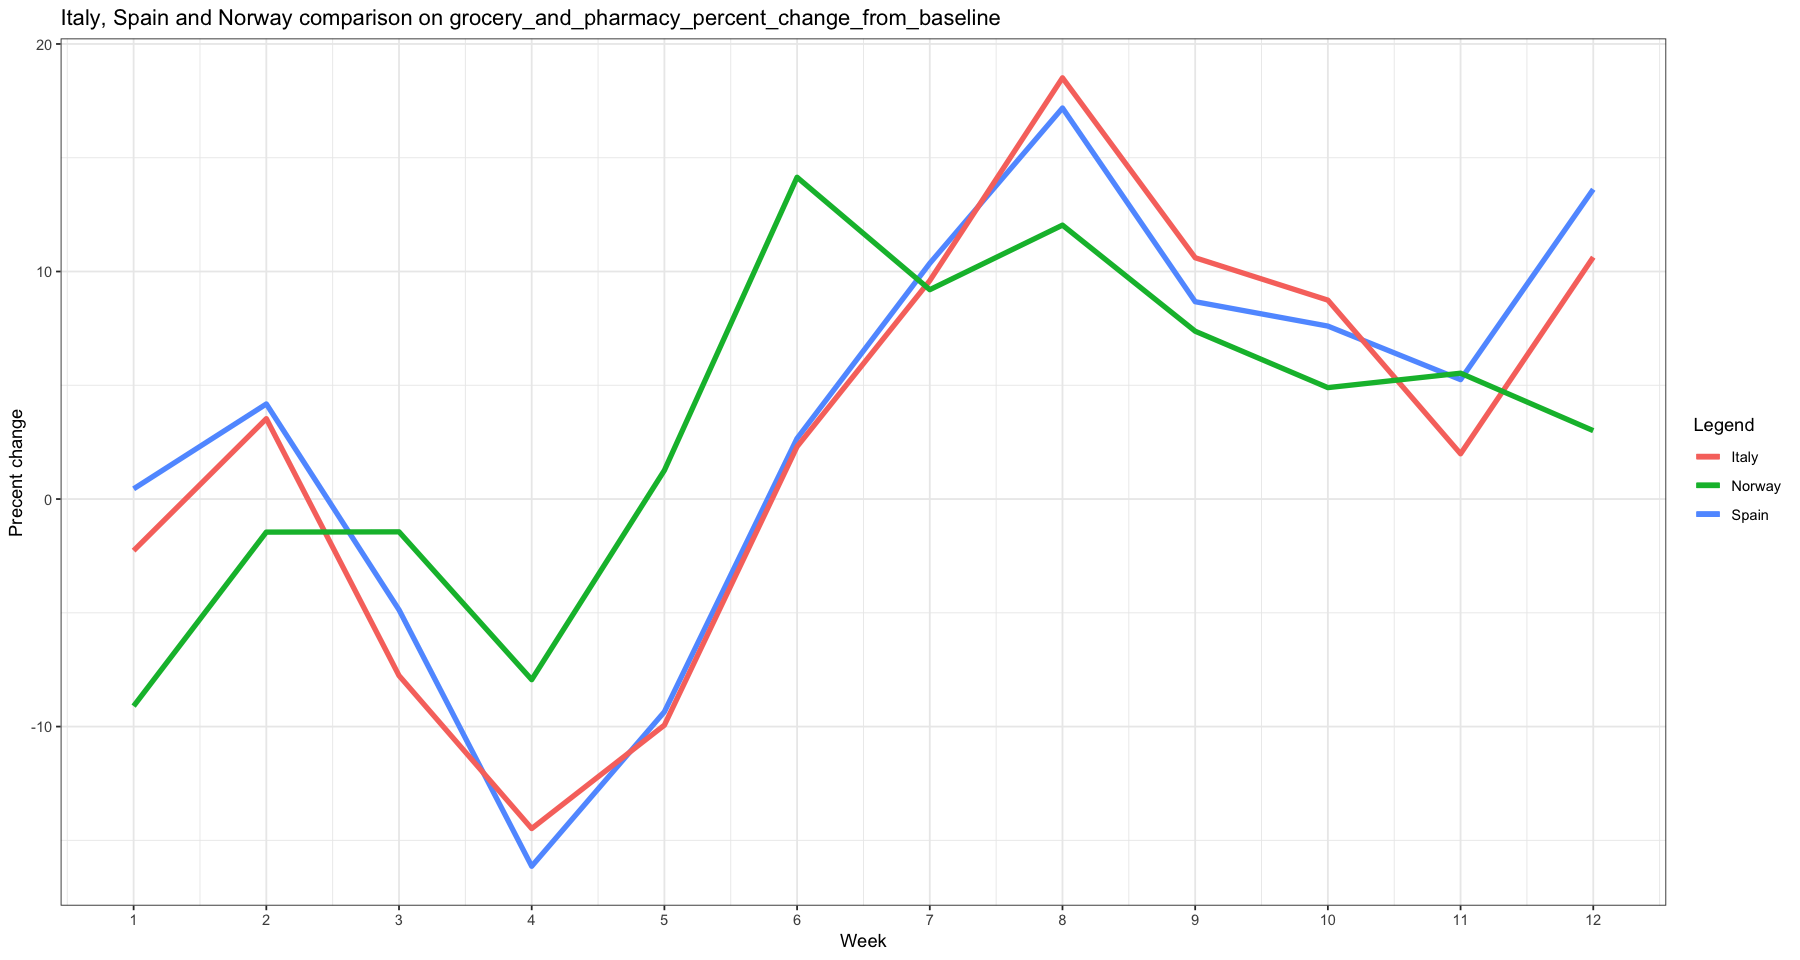

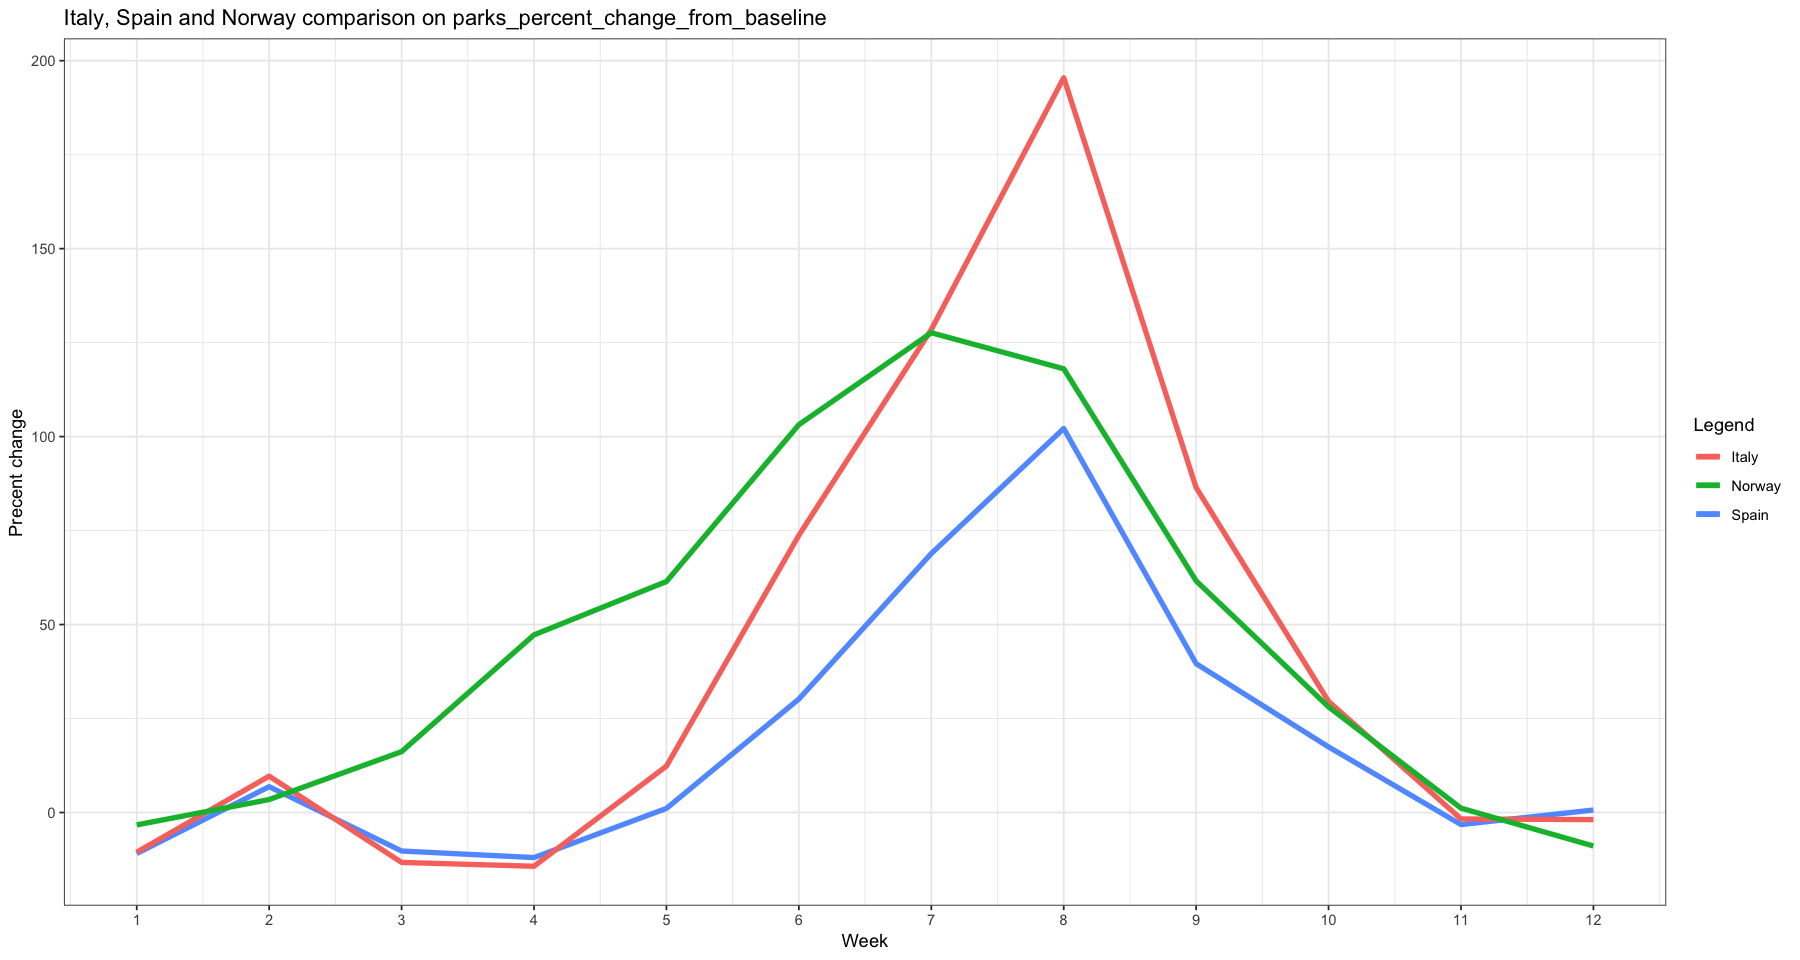

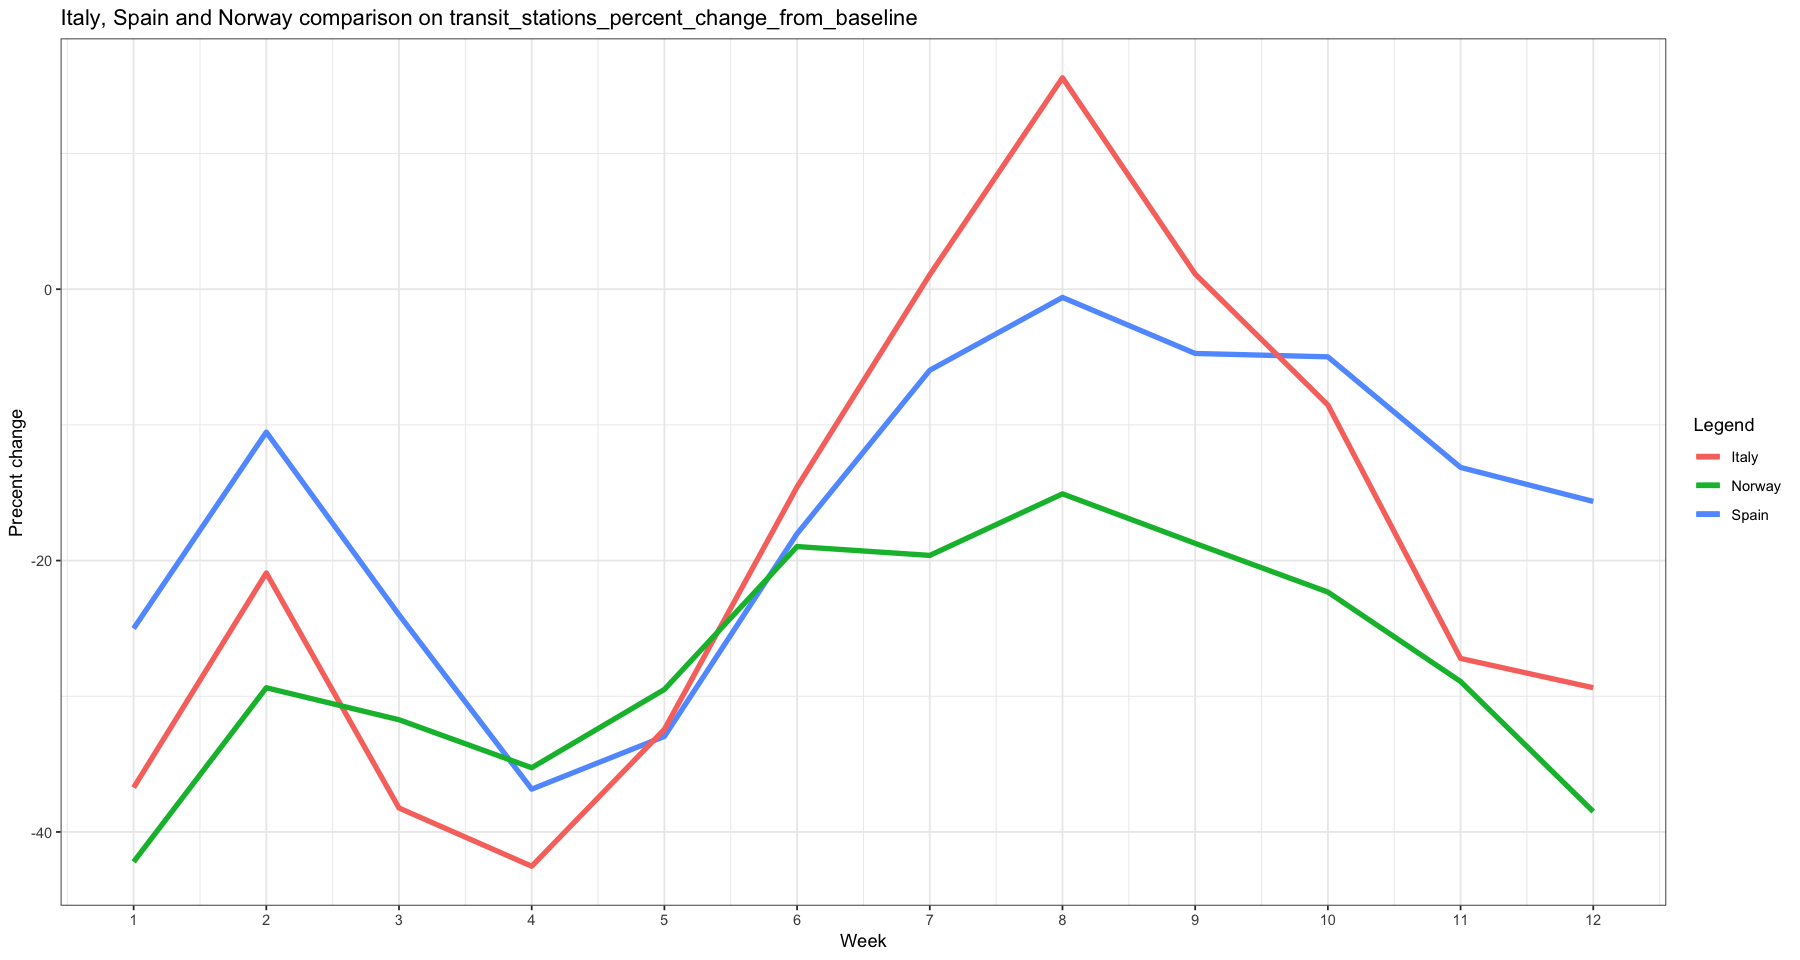

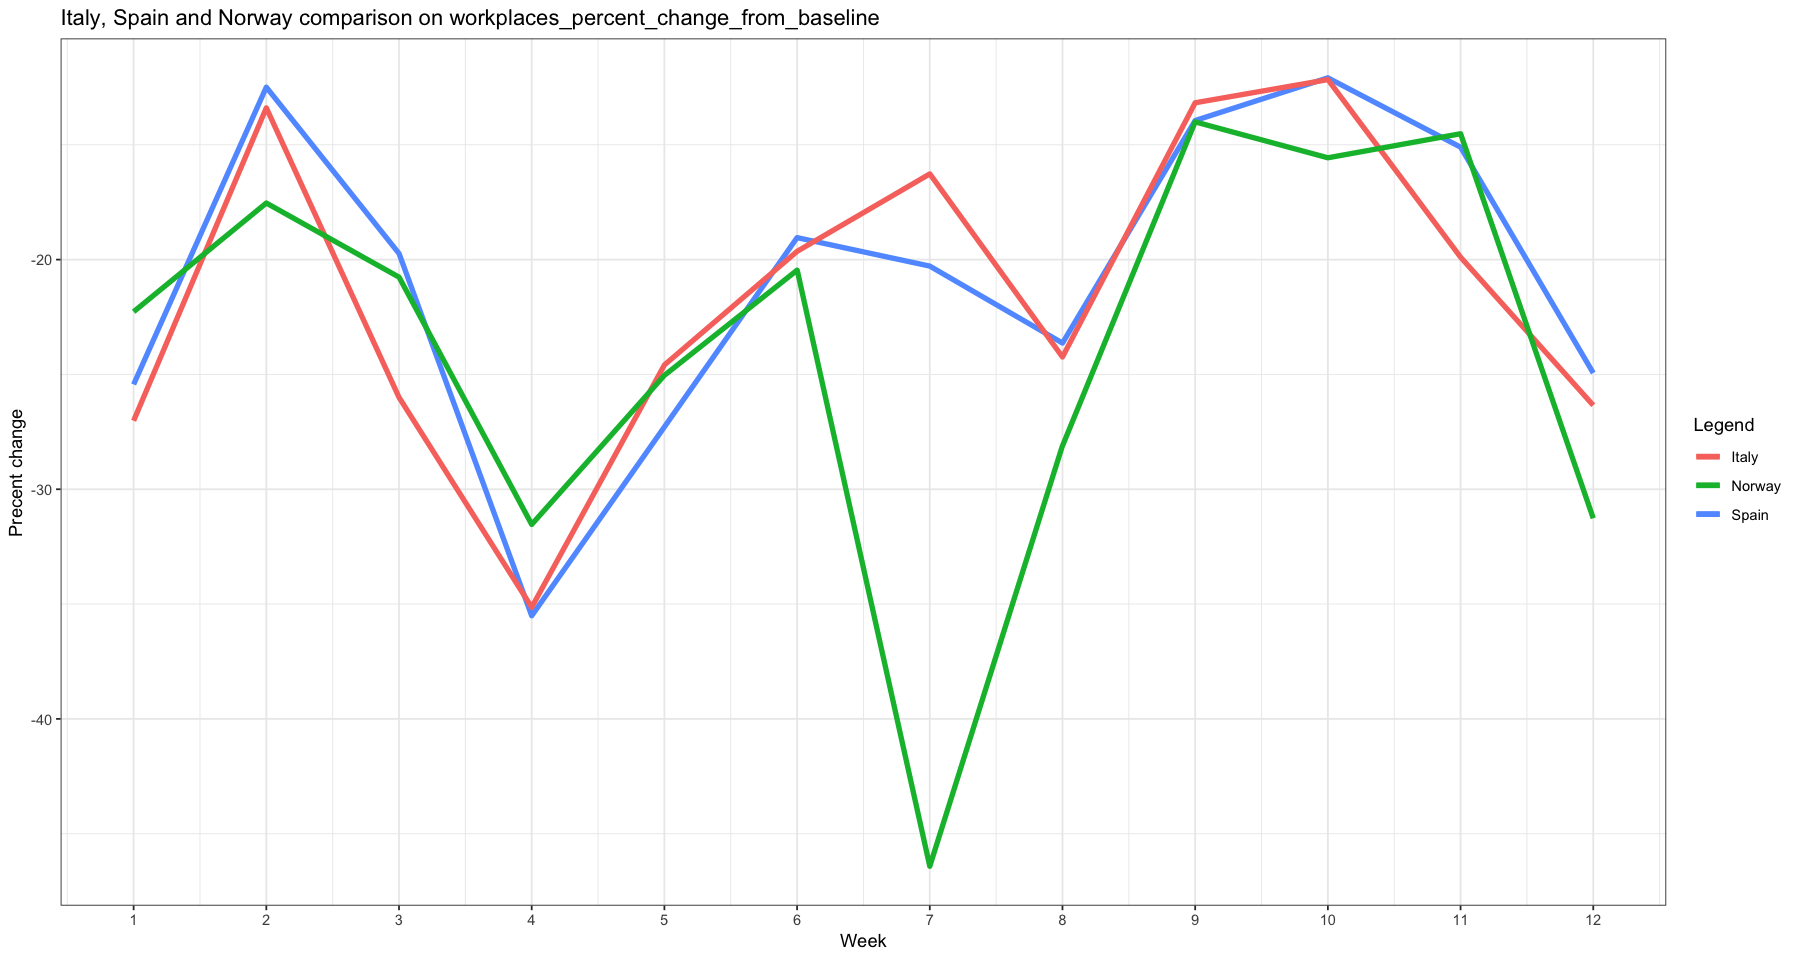

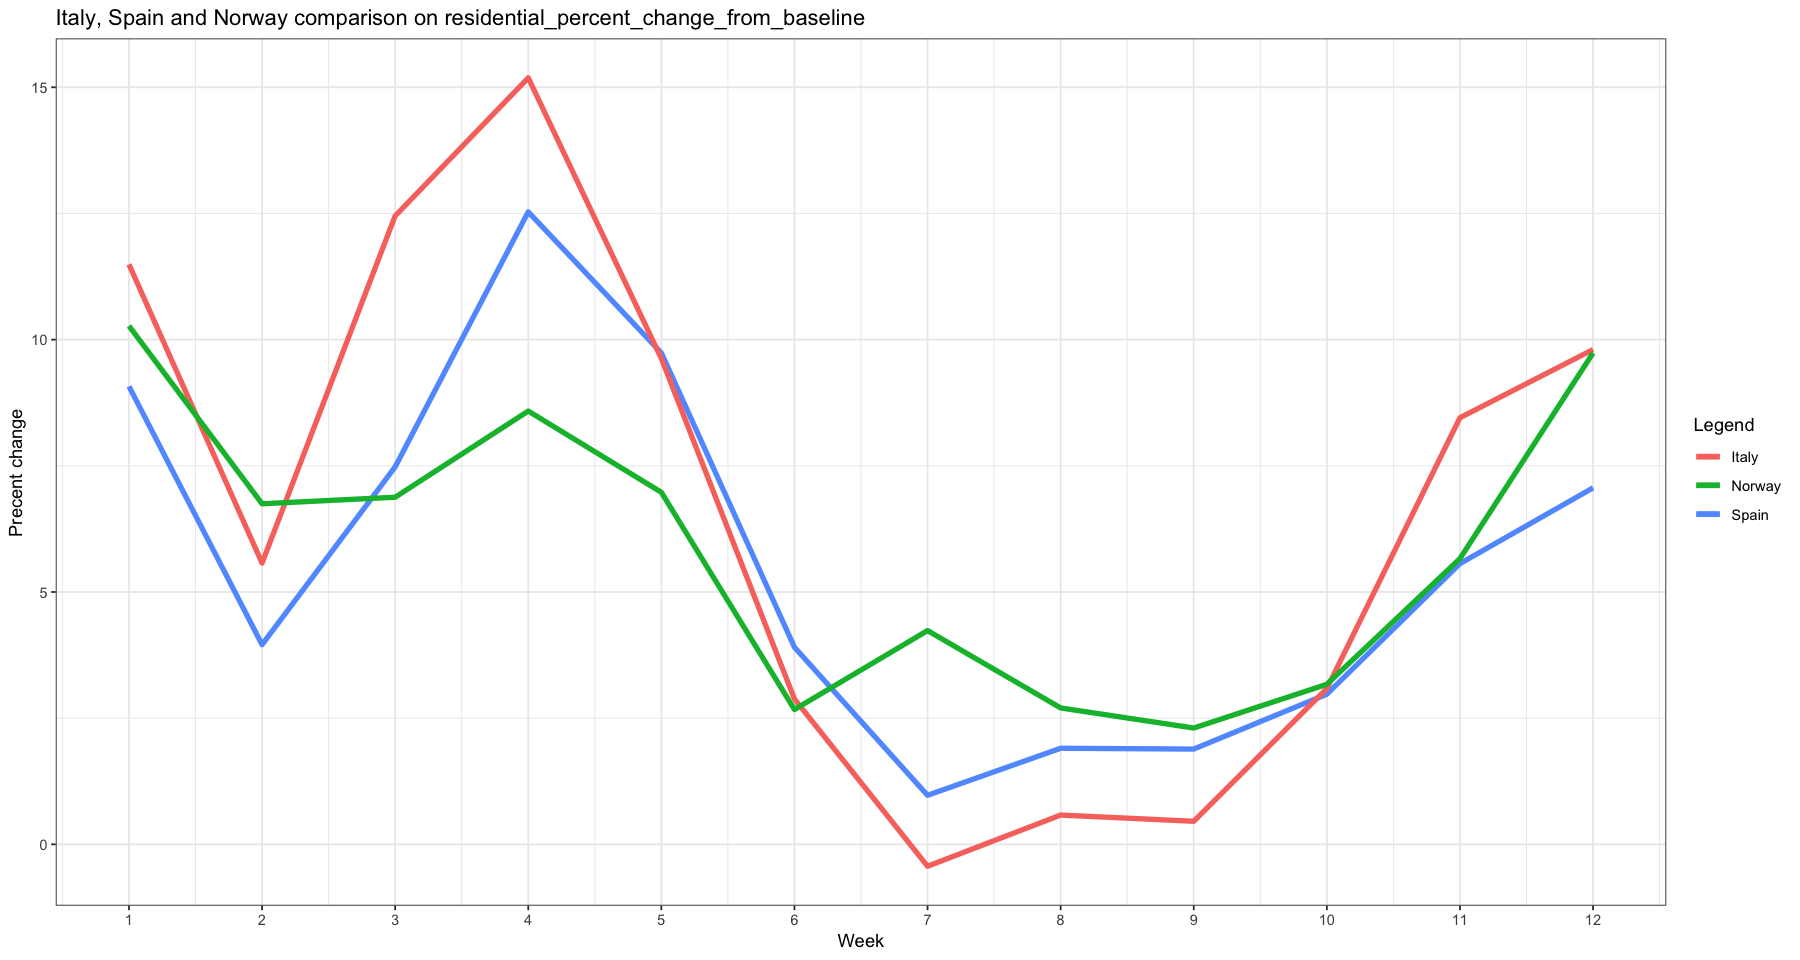

In [236]:

options(repr.plot.width=15, repr.plot.height=8)
df_spain <- df_1[df_1$country_region == 'Spain',]
df_italy <- df_1[df_1$country_region == 'Italy',]
df_norway <- df_1[df_1$country_region == 'Norway',]


for (category in categories){
    plot_italy <- summarise_at(group_by(df_italy, month), vars(category), funs(mean(., na.rm=TRUE)))
    plot_spain <- summarise_at(group_by(df_spain, month), vars(category), funs(mean(., na.rm=TRUE)))
    plot_norway <- summarise_at(group_by(df_norway, month), vars(category), funs(mean(., na.rm=TRUE)))

    print(comparison_month(feature=category))

}


The above plots show how different governments treated restriction diffrently also between categories 

Here we evaluate the percentage change in mobility stations in the 3 countries with a boxplot

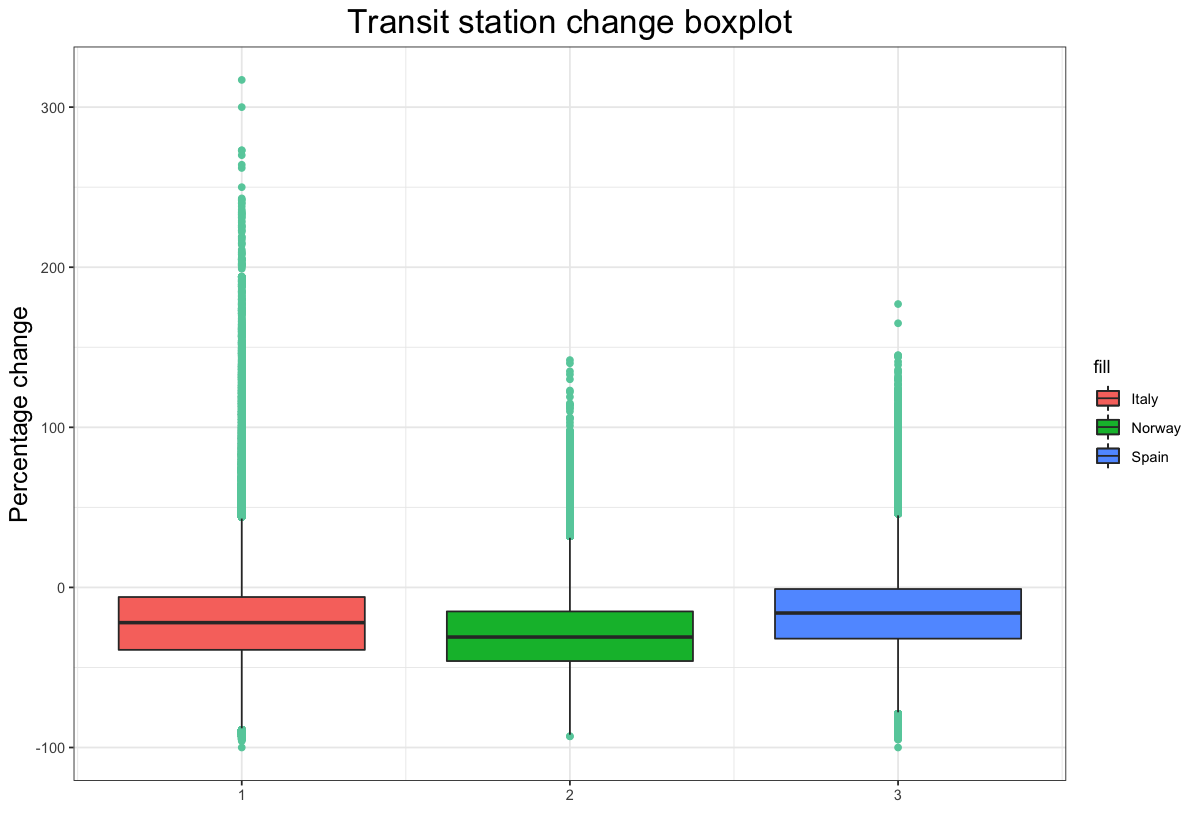

In [272]:
options(repr.plot.width=10, repr.plot.height=7)
# Basic box plot
plot <- ggplot() + 
  geom_boxplot(aes(x=1, y=df_italy$transit_stations_percent_change_from_baseline,fill='Italy'), outlier.colour="aquamarine3") +
  geom_boxplot(aes(x=2, y=df_norway$transit_stations_percent_change_from_baseline,  fill='Norway'), outlier.colour="aquamarine3") +
  geom_boxplot(aes(x=3, y=df_spain$transit_stations_percent_change_from_baseline, fill='Spain'), outlier.colour="aquamarine3") +
  labs(title = 'Transit station change boxplot', x='', y='Percentage change', fill='Legend') +
  theme_bw() +
  theme(plot.title = element_text(size=20, hjust=0.5)) +
  theme(axis.title = element_text(size=15)) 
  

plot

# Exercise 2

In [9]:



n_numbers <- readline(prompt="How many numbers you wanna draw?: ")
final_df <- data.frame(0, 0)
colnames(final_df) <- c('Extracted numbers', 'Extraction')
number <- readline(prompt="Insert the seed: ")
number <- as.numeric(number)
for (j in seq(1:n_numbers)){
    
    rand_number <- number^2

    tmp <- unlist(strsplit(as.character(rand_number),""))
    tmp_2 <- unlist(strsplit(as.character(number),""))

    #We will deal with an even number of digits of the squared part
    #removing one more digit on the left part of the number. We do that through the functions

    x <- (tmp[(ceiling((length(tmp) - length(tmp_2))/2)+1):(length(tmp) - floor((length(tmp) - length(tmp_2))/2))])

    #Here we shift to the left if the number starts with a 0
    i <- 1
    while (x[1] == 0){
        x <- (tmp[(ceiling((length(tmp) - length(tmp_2))/2)+1 - i):(length(tmp) - floor((length(tmp) - length(tmp_2))/2)-i)])
        i <- i+1

    }
    
    
    number <- as.numeric(paste(x, collapse=""))
    
    final_df[j,1]=number
    final_df[j,2]=j
}
final_df


Extracted numbers Extraction
1  63580              1        
2  24164              2        
3  38988              3        
4  20064              4        
5  25640              5        
6  74096              6        
7  90217              7        
8  91070              8        
9  37449              9        
10 24276             10

# Exercise 3

## Point 1

For the percentage of people that have read the journal we could assume a uniform distribution distribution or, if we are not speaking of the very first issue of the journal we could use a distribution peaked on an estimation of how many people read the previous issue (e.g. previous survey), another example could be a disutribution (e.g. beta or gaussian) peaked on the performances of a similar journal.



## Point 2

In [5]:
r <- 26
n <- 150
probability <- seq(0, 1, by= 0.001)
posterior <- probability^r*(1-probability)^(n-r)


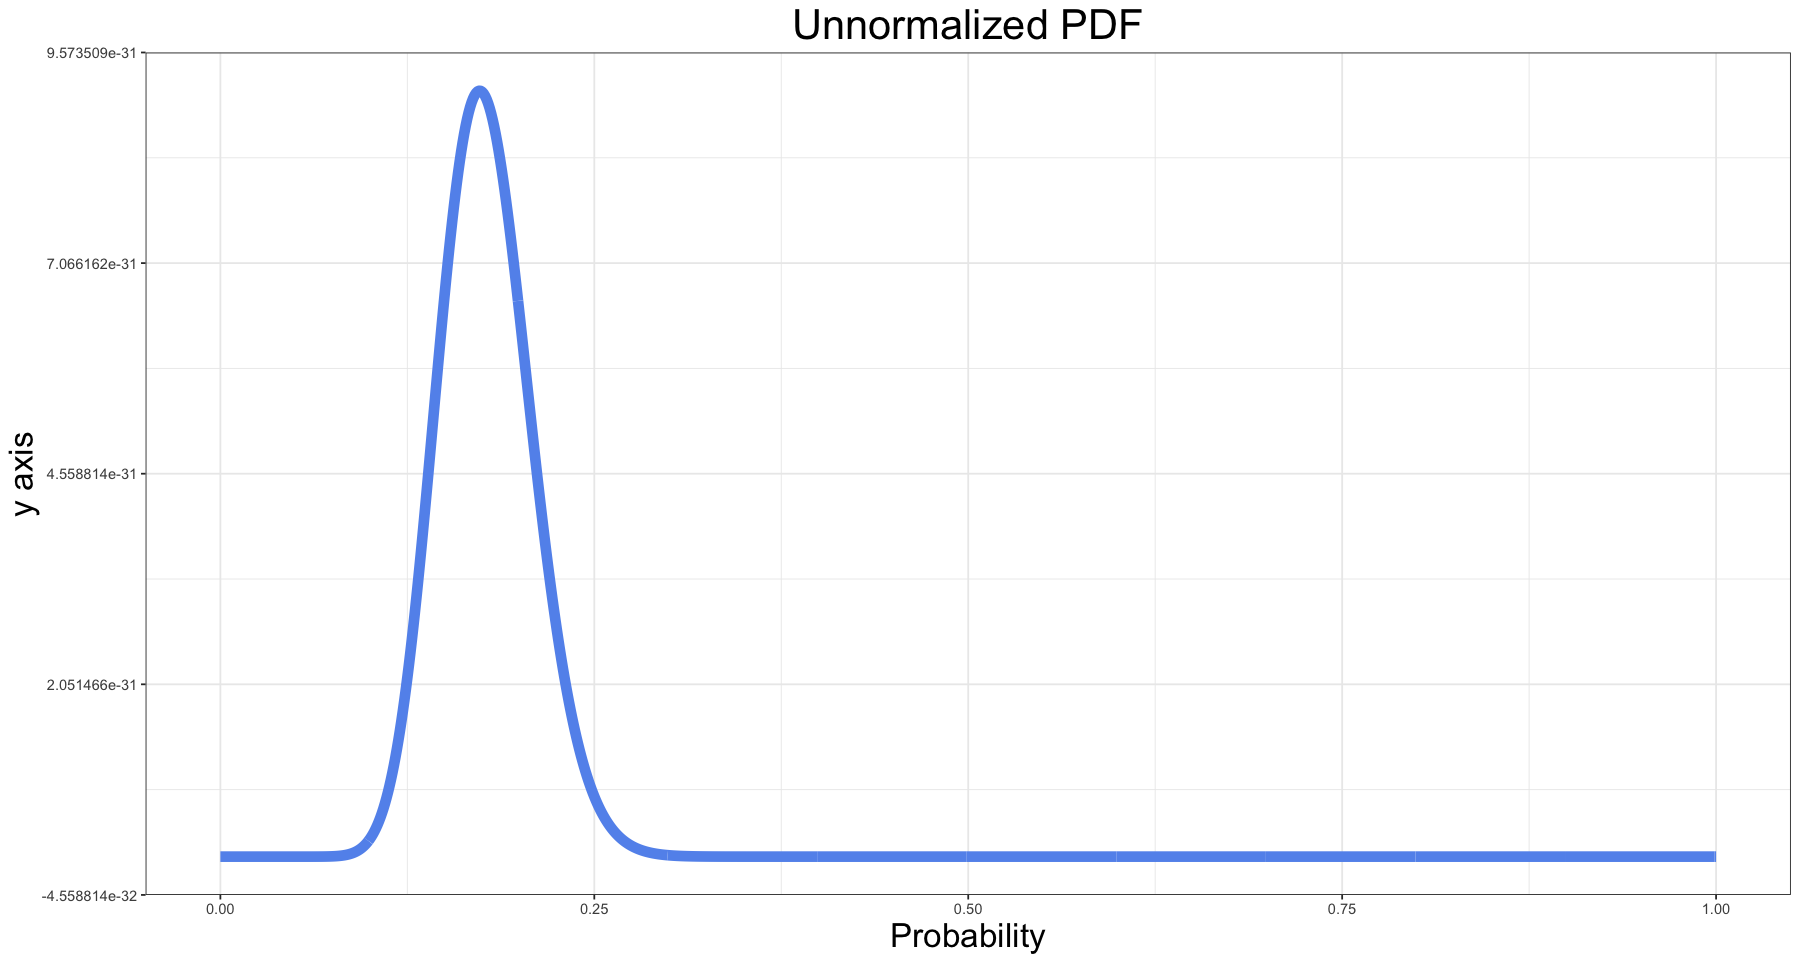

In [6]:
options(repr.plot.width=15, repr.plot.height=8)
plot <- ggplot() +
        geom_line(aes(x=probability, y=posterior), pch=21, color='cornflowerblue', size=3) +
        theme_bw() +
        labs(title='Unnormalized PDF', x='Probability', y='y axis') +
        theme(plot.title = element_text(size=25, hjust = 0.5)) +
        theme(axis.title = element_text(size=20, hjust = 0.5))

plot

In [7]:
posterior_unif <- probability^r*(1-probability)^(n-r)
posterior_func_unif <- function(x, r=26, n=150){
    return(x^r*(1-x)^(n-r))
}

In [8]:
evidence <- integrate(posterior_func_unif, lower=0, upper=1)
evidence$value

[1] 7.040661e-32

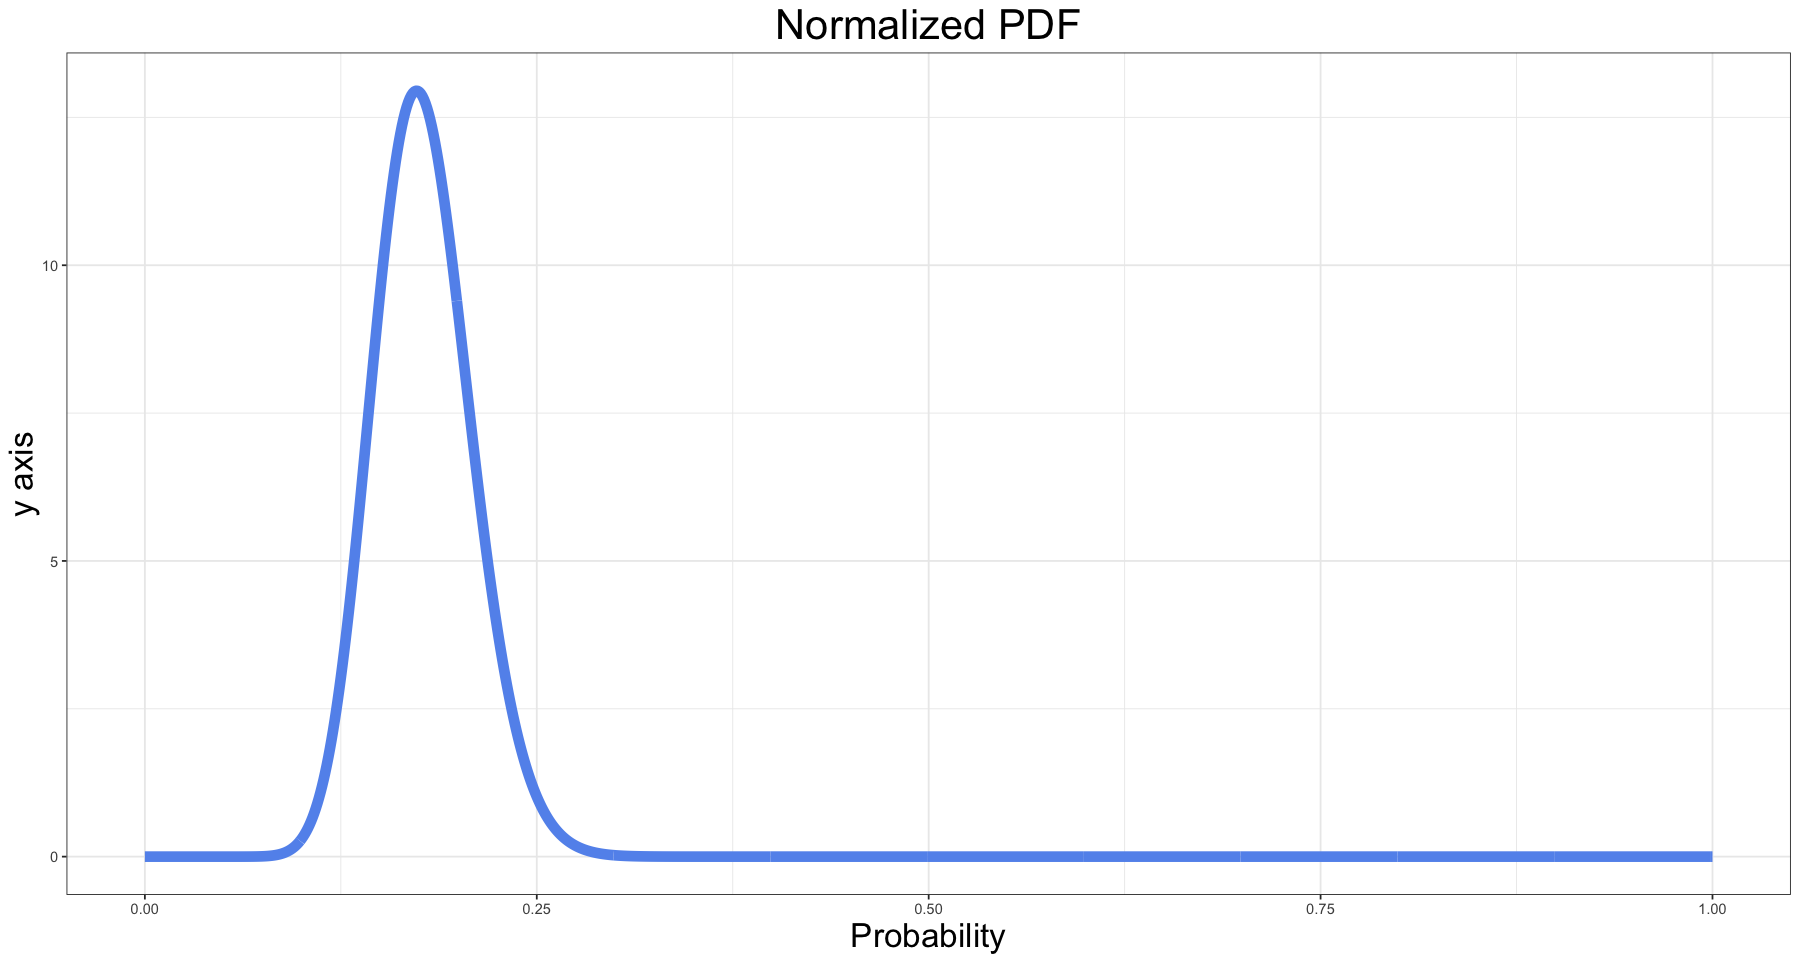

In [9]:
plot <- ggplot() +
        geom_line(aes(x=probability, y=posterior_unif/evidence$value), pch=21, color='cornflowerblue', size=3) +
        theme_bw() +
        labs(title='Normalized PDF', x='Probability', y='y axis') +
        theme(plot.title = element_text(size=25, hjust = 0.5)) +
        theme(axis.title = element_text(size=20, hjust = 0.5))

plot

## Point 3

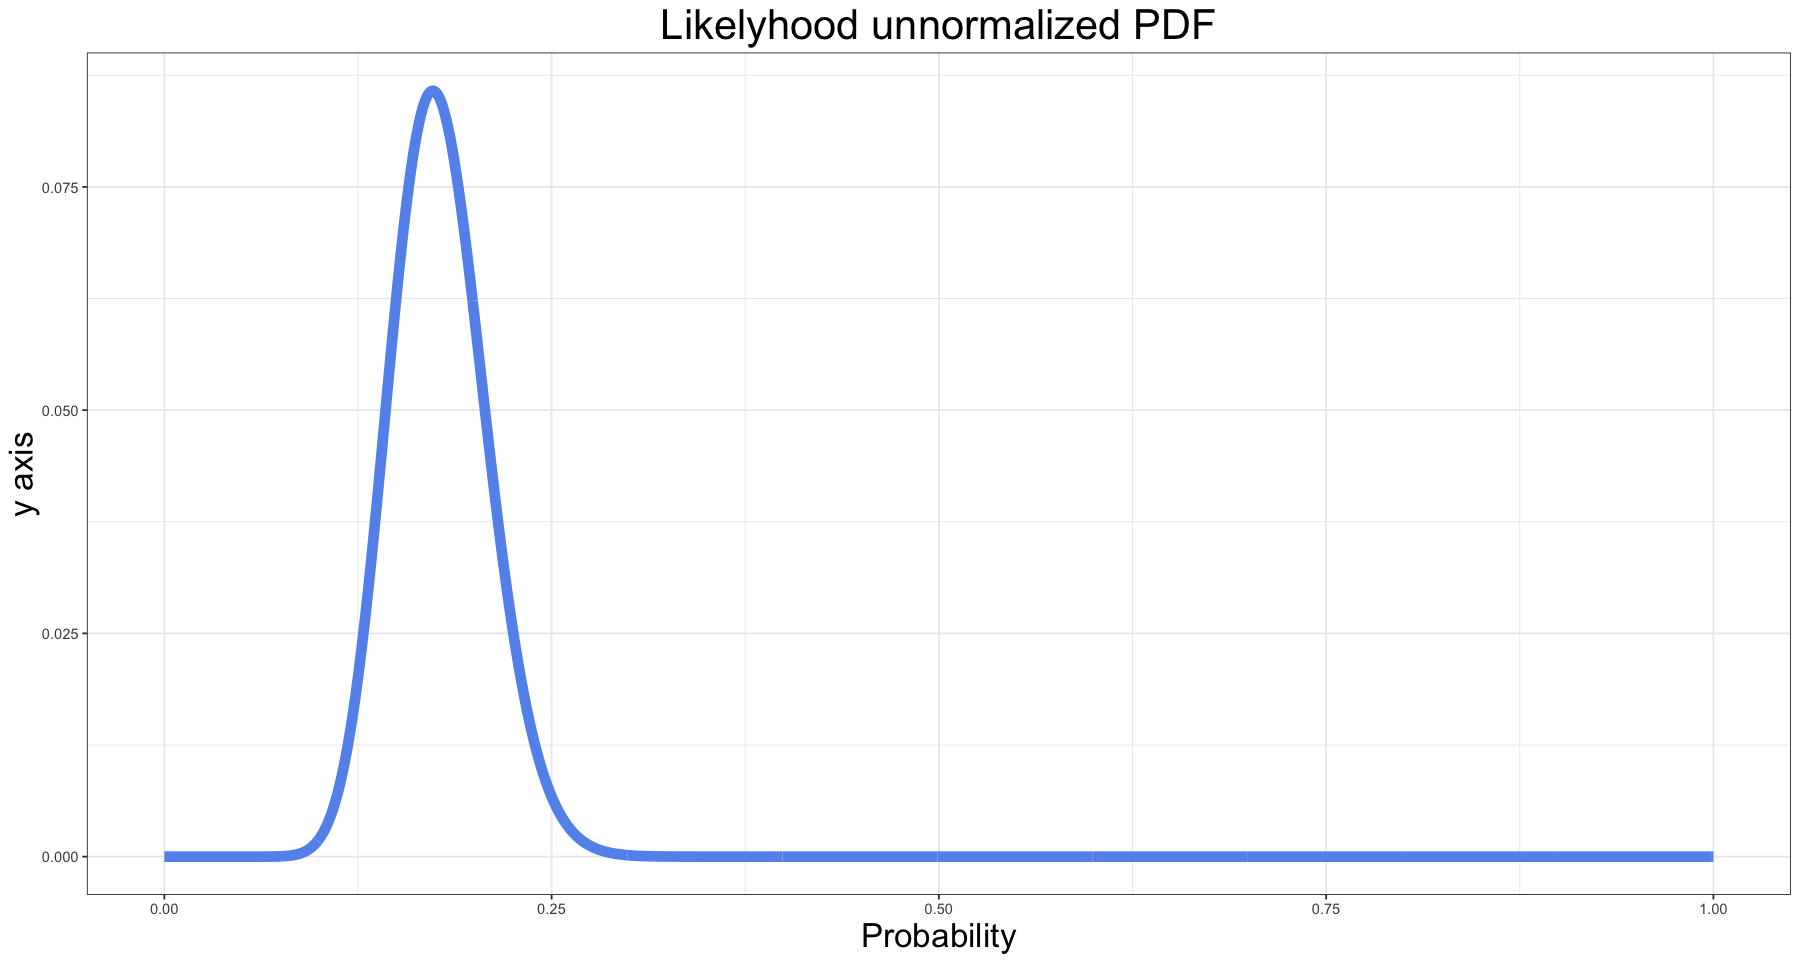

In [10]:
binomial <- choose(n, r)*probability^r*(1-probability)^(n-r)


plot <- ggplot() +
        geom_line(aes(x=probability, y=binomial), pch=21, color='cornflowerblue', size=3) +
        theme_bw() +
        labs(title='Likelyhood unnormalized PDF', x='Probability', y='y axis') +
        theme(plot.title = element_text(size=25, hjust = 0.5)) +
        theme(axis.title = element_text(size=20, hjust = 0.5))

plot

**Being the posterior proportional to the likelyhood the two normalized PDFs will coincide**

## Point 4

Draws' results: T, T, T, T, T, H, T, T, H, H, T, T, H, H, H, T, H, T, H, T, H, H, T, H, T, H, T, H, H, H

15 heads,
15 tails

We use as r the number of heads even if here the anlaysis is totally simmetric

## Point 1

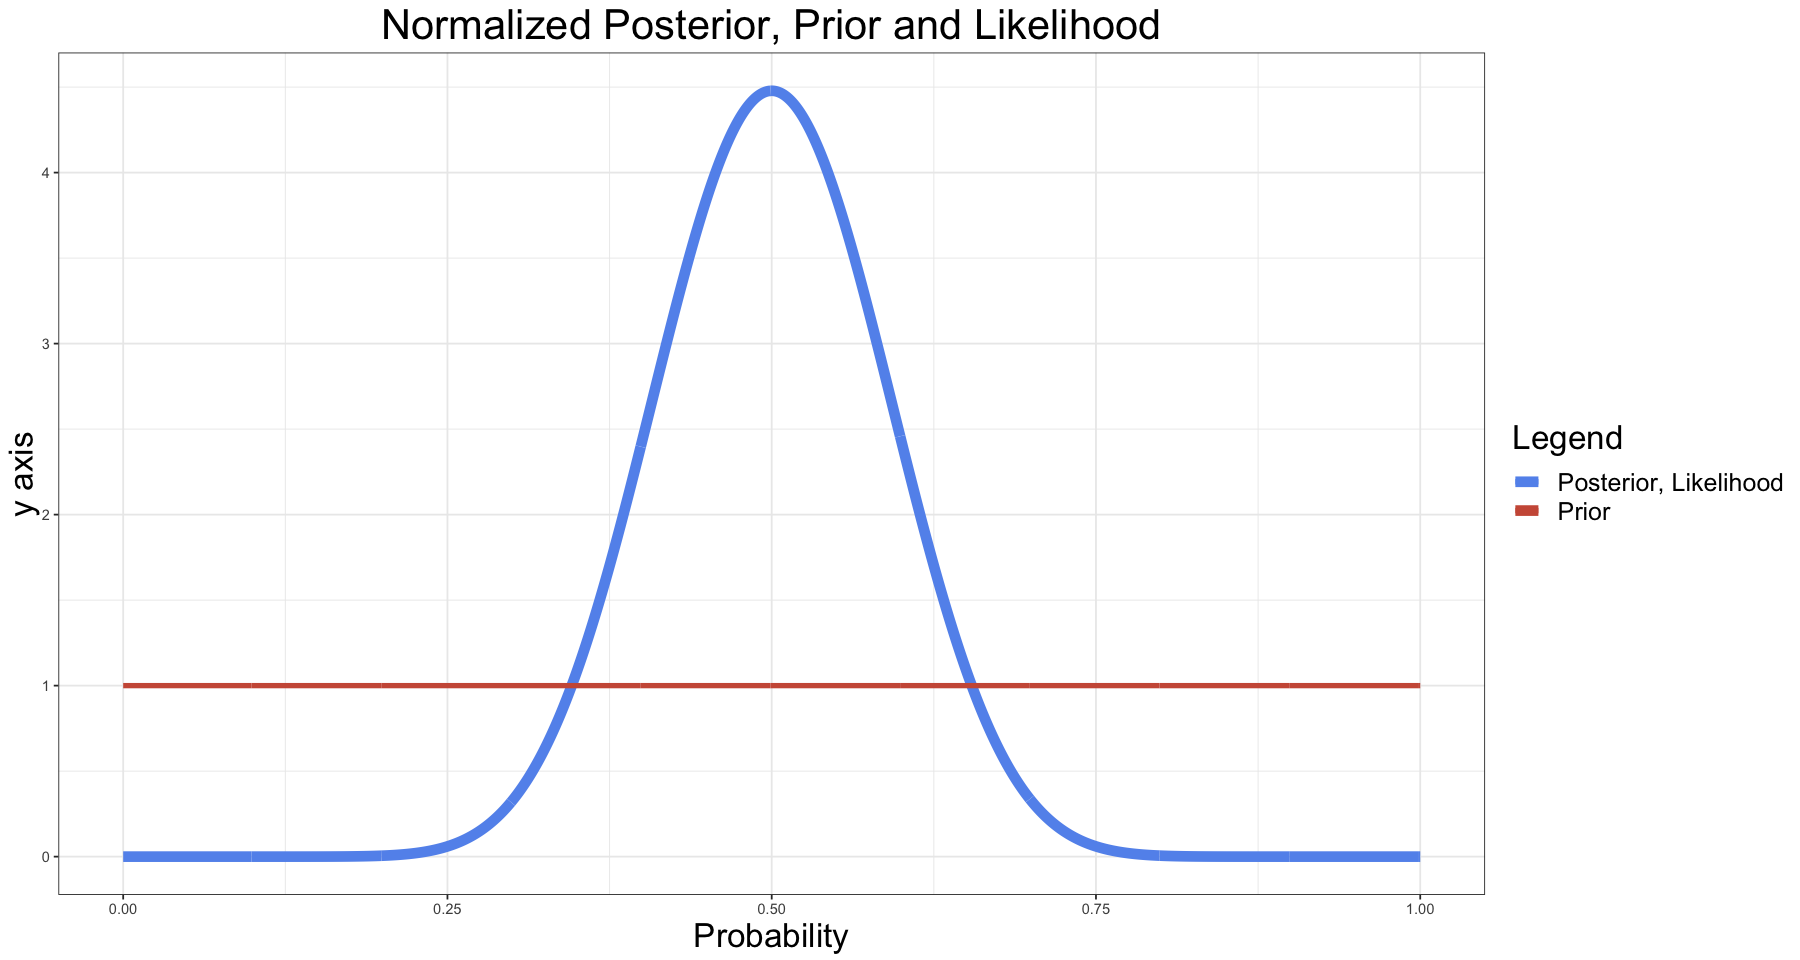

In [59]:
#Unifrom prior case
n <- 30
r <- 15
posterior_unif <- probability^r*(1-probability)^(n-r)
posterior_func_unif <- function(x){
    return(x^r*(1-x)^(n-r))
}

evidence <- integrate(posterior_func_unif, lower=0, upper=1)


plot <- ggplot() +
        geom_line(aes(x=probability, y=posterior_unif/evidence$value, color='Posterior, Likelihood'), pch=21, size=3) +
        theme_bw() +
        labs(title='Normalized Posterior, Prior and Likelihood', x='Probability', y='y axis', color='Legend') +
        theme(plot.title = element_text(size=25, hjust = 0.5)) +
        theme(axis.title = element_text(size=20, hjust = 0.5)) +
        geom_line(aes(x=probability, y=1, color='Prior'), lwd=1.5) +
        scale_color_manual(values = c('Posterior, Likelihood' = 'cornflowerblue','Prior' = 'coral3')) +
        theme(legend.text = element_text(size=15)) + 
        theme(legend.title = element_text(size=20)) 
       

plot


In [60]:
#dataframe with cumulative of the posterior and relative probability
cumul_df <- data.frame(probability[1], (1/evidence$value)*integrate(posterior_func_unif, lower=0, upper=probability[1])$value)
colnames(cumul_df) <- c('probability', 'cumulative')
for (i in 2:length(probability)){
    cumul_df[i,] <- c(probability[i], (1/evidence$value)*integrate(posterior_func_unif, lower=0, upper=probability[i])$value)
}
head(cumul_df)

probability cumulative  
1 0.000       0.000000e+00
2 0.001       2.963252e-40
3 0.002       1.914737e-35
4 0.003       1.240007e-32
5 0.004       1.219814e-30
6 0.005       4.272654e-29

In [61]:
#Here we find the probability that corresponds to the first 2,5% to exclude to compute the credibility interval
lower_bound <- cumul_df[cumul_df$cumulative < 0.025,][nrow(cumul_df[cumul_df$cumulative < 0.025,]),]
lower_bound

probability cumulative
331 0.33        0.02456715

In [62]:
upper_bound <- cumul_df[cumul_df$cumulative < 0.975,][nrow(cumul_df[cumul_df$cumulative < 0.975,]),]
upper_bound

probability cumulative
670 0.669       0.9747153

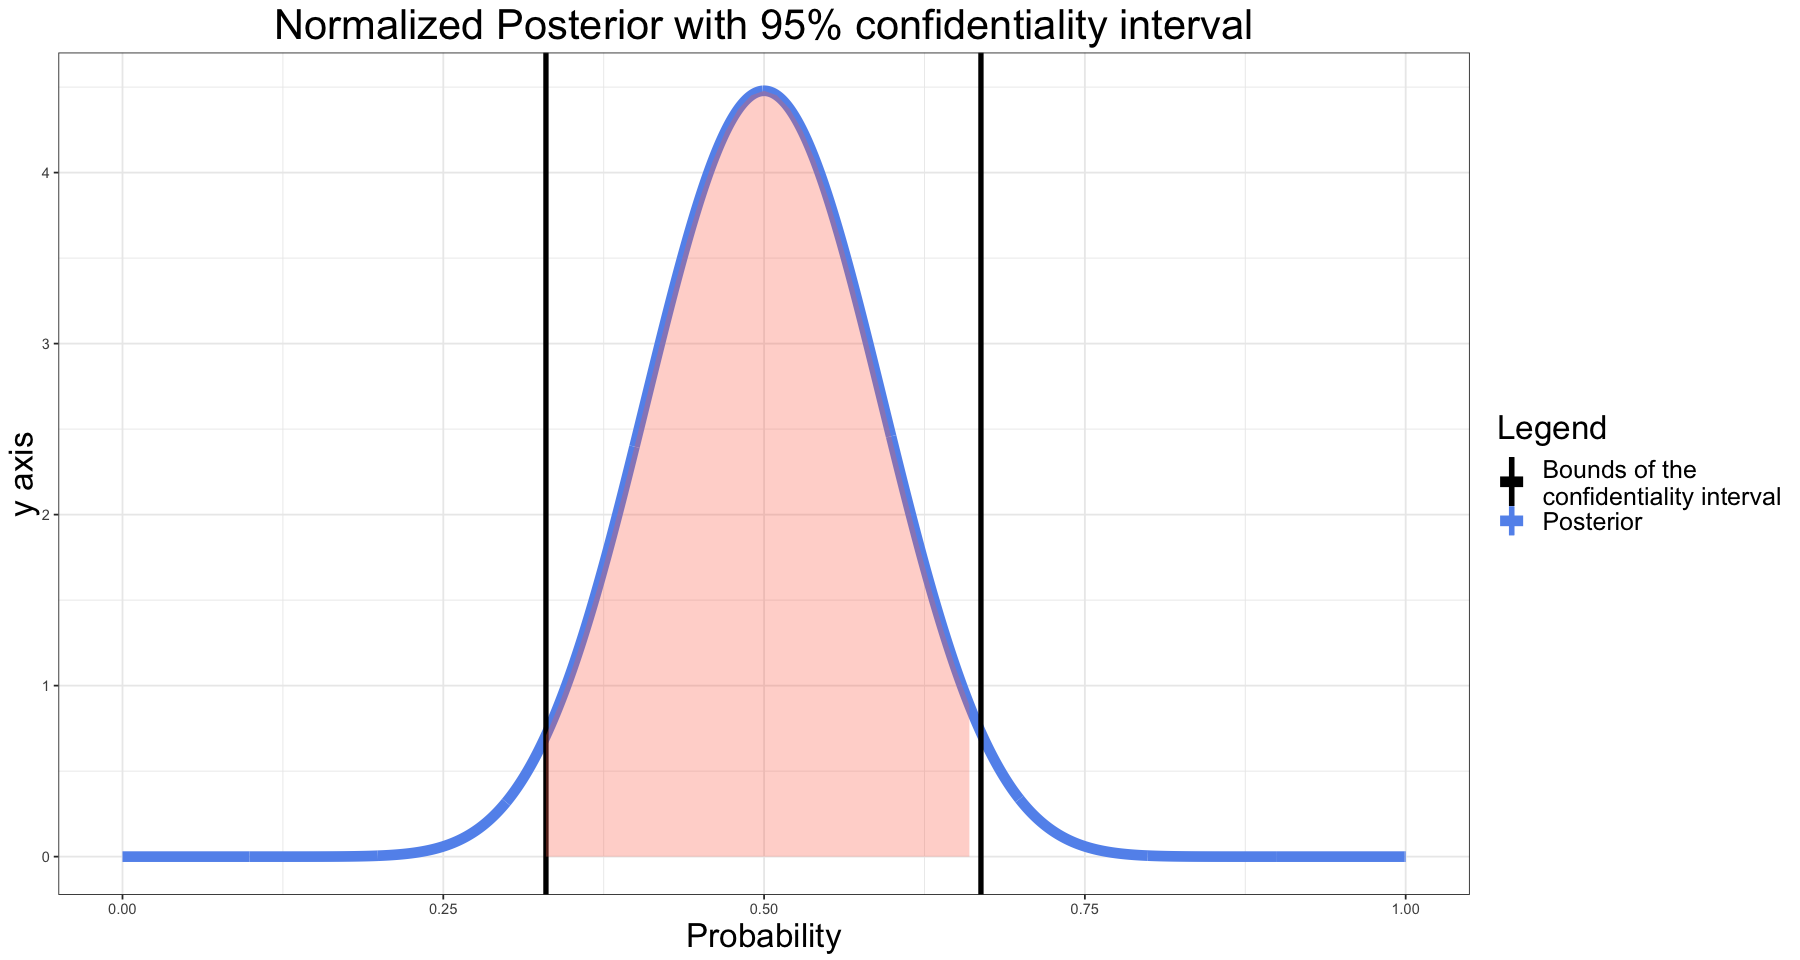

In [70]:
plot <- ggplot() +
        geom_line(aes(x=probability, y=posterior_unif/evidence$value, color='Posterior'), pch=21, size=3) +
        theme_bw() +
        labs(title='Normalized Posterior with 95% confidentiality interval', x='Probability', y='y axis', color='Legend') +
        theme(plot.title = element_text(size=25, hjust = 0.5)) +
        theme(axis.title = element_text(size=20, hjust = 0.5)) +
        
        geom_vline(aes(xintercept=lower_bound$probability, color='Bounds of the\nconfidentiality interval'), lwd=1.5) +
        
        geom_vline(aes(xintercept=upper_bound$probability, color='Bounds of the\nconfidentiality interval'), lwd=1.5) +
        
        theme(legend.text = element_text(size=15)) + 
        theme(legend.title = element_text(size=20)) +
        scale_color_manual(values = c('Posterior' = 'cornflowerblue', 'Bounds of the\nconfidentiality interval' ='black')) +
        geom_ribbon(aes(x = seq(lower_bound$probability, upper_bound$probability, by=0.01), ymin=0, ymax=(seq(lower_bound$probability, upper_bound$probability, by=0.01)^r*(1-seq(lower_bound$probability, upper_bound$probability, by=0.01))^(n-r))/evidence$value), alpha =0.3, fill = 'coral1')

plot

In [100]:
cat('We evaluate probable value for the coin probability p as the maximum of the posterior', 'p:', 0.5, '\n')

max_index <- which.max(posterior_unif/(evidence$value))
max_prob <- probability[max_index]

cat('Checking if it is infact 0.5:\n')

cat('Maximum probability = ', max_prob)

We evaluate probable value for the coin probability p as the maximum of the posterior p: 0.5 
Checking if it is infact 0.5:
Maximum probability =  0.5

We assume, for the case of a beta distribution chosena as a prior, a symmetric one with mode = mean = 0.5. We thus choose
$$
\alpha = \beta = 10
$$

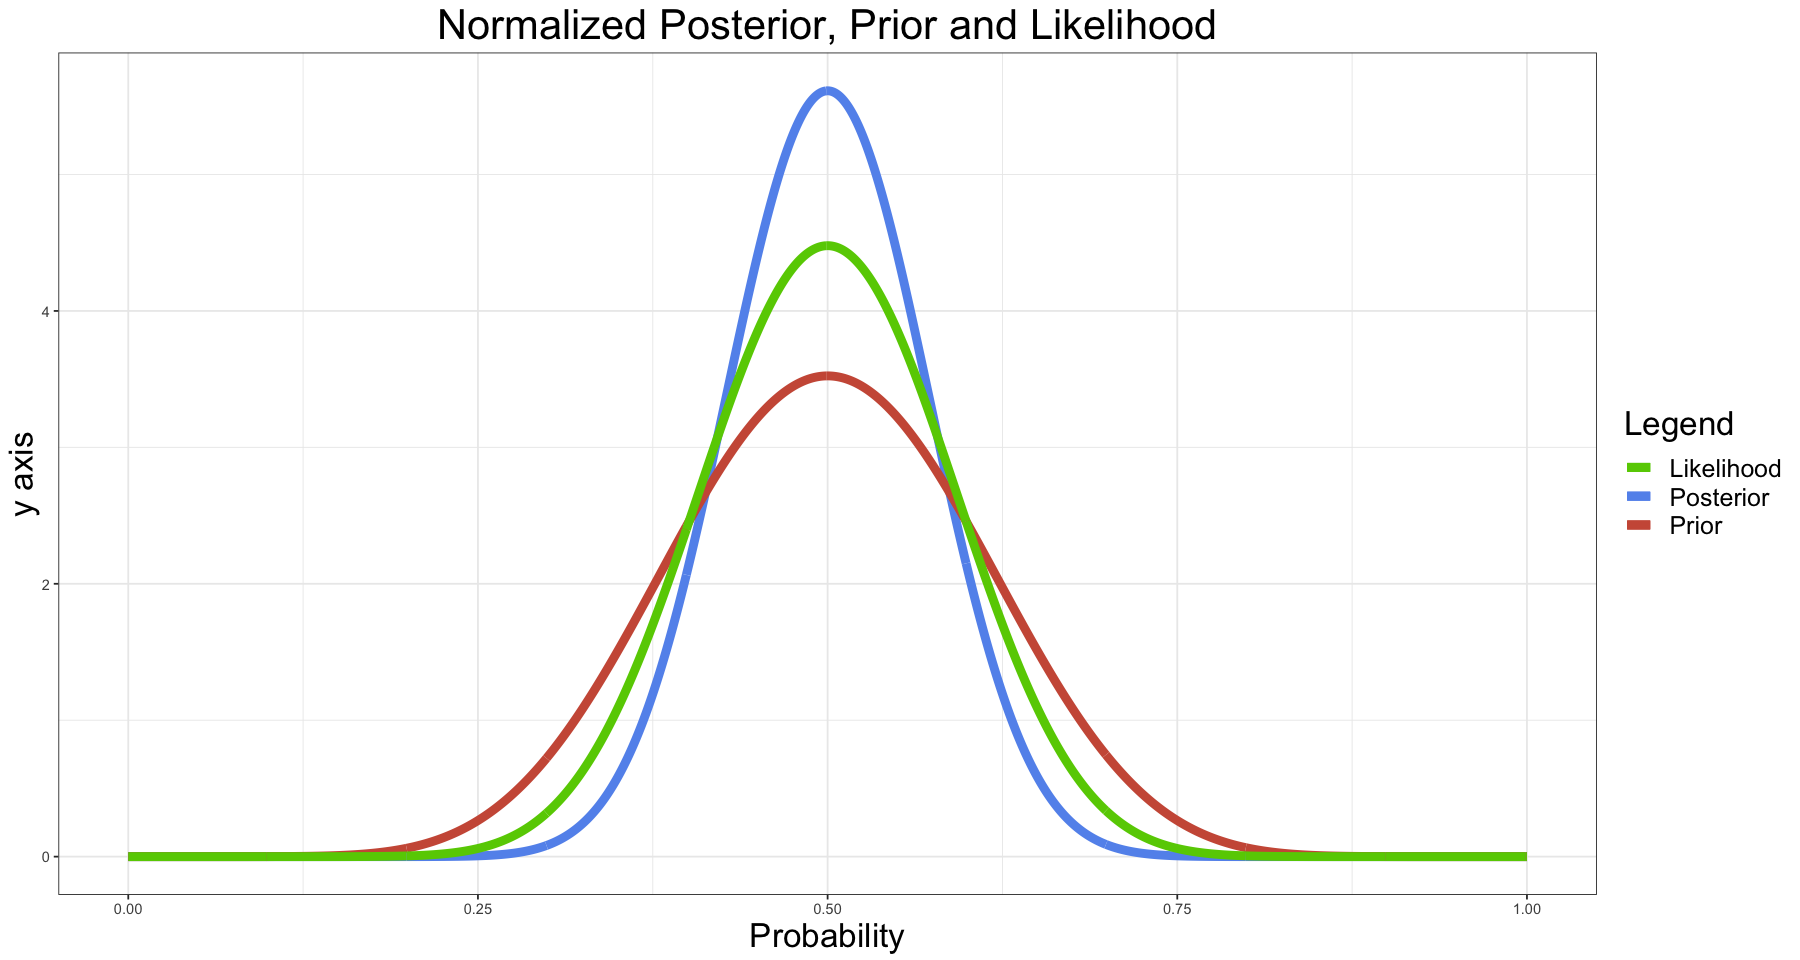

In [40]:
#Beta prior case
alpha <- 10
beta <- 10
prior <- dbeta(probability, alpha, beta)



likelihood <- function(x){
    return(choose(n, r)*x^r*(1-x)^(n-r))
}


lik_normalization <- integrate(likelihood, lower=0, upper=1)


binomial <- choose(n, r)*probability^r*(1-probability)^(n-r)

plot <- ggplot() +
#The posterior is still a beta with paramenters a + n and n - r + b
        geom_line(aes(x=probability, y=dbeta(probability, alpha + r, beta + n -r), color='Posterior'), pch=21, lwd=2.5) +
        
        theme_bw() +
        labs(title='Normalized Posterior, Prior and Likelihood', x='Probability', y='y axis', color='Legend') +
        theme(plot.title = element_text(size=25, hjust = 0.5)) +
        theme(axis.title = element_text(size=20, hjust = 0.5)) +
        
        geom_line(aes(x=probability,y=dbeta(probability, alpha, beta) , color='Prior'), lwd=2.5) +

        geom_line(aes(x=probability, y=binomial/lik_normalization$value, color='Likelihood'),  lwd=2.5) +

        scale_color_manual(values = c('Posterior' = 'cornflowerblue','Prior' = 'coral3', 'Likelihood'='chartreuse3')) +
        theme(legend.text = element_text(size=15)) + 
        theme(legend.title = element_text(size=20)) 
       

plot

In [101]:
cat('We evaluate probable value for the coin probability p as the maximum of the posterior', 'p:', 0.5, '\n')
cat('Checking if it is infact 0.5:\n')
max_index <- which.max(dbeta(probability, alpha + r, beta + n -r))
max_prob <- probability[max_index]
cat('Checking if it is infact 0.5:\n')

cat('Maximum probability = ', max_prob)

We evaluate probable value for the coin probability p as the maximum of the posterior p: 0.5 
Checking if it is infact 0.5:
Checking if it is infact 0.5:
Maximum probability =  0.5

In [42]:
#dataframe with cumulative of the posterior and relative probability
cumul_df <- data.frame(probability, pbeta(probability, alpha + r, beta + n -r))
colnames(cumul_df) <- c('probability', 'cumulative')
head(cumul_df)


probability cumulative  
1 0.000       0.000000e+00
2 0.001       6.176276e-62
3 0.002       2.025072e-54
4 0.003       4.996621e-50
5 0.004       6.487688e-47
6 0.005       1.677938e-44

In [43]:
#Here we find the probability that corresponds to the first 2,5% to exclude to compute the credibility interval
lower_bound <- cumul_df[cumul_df$cumulative < 0.025,][nrow(cumul_df[cumul_df$cumulative < 0.025,]),]
lower_bound

probability cumulative
364 0.363       0.02467196

In [47]:
#Same for the upper bound 
upper_bound <- cumul_df[cumul_df$cumulative < 0.975,][nrow(cumul_df[cumul_df$cumulative < 0.975,]),]
upper_bound

probability cumulative
637 0.636       0.9744531

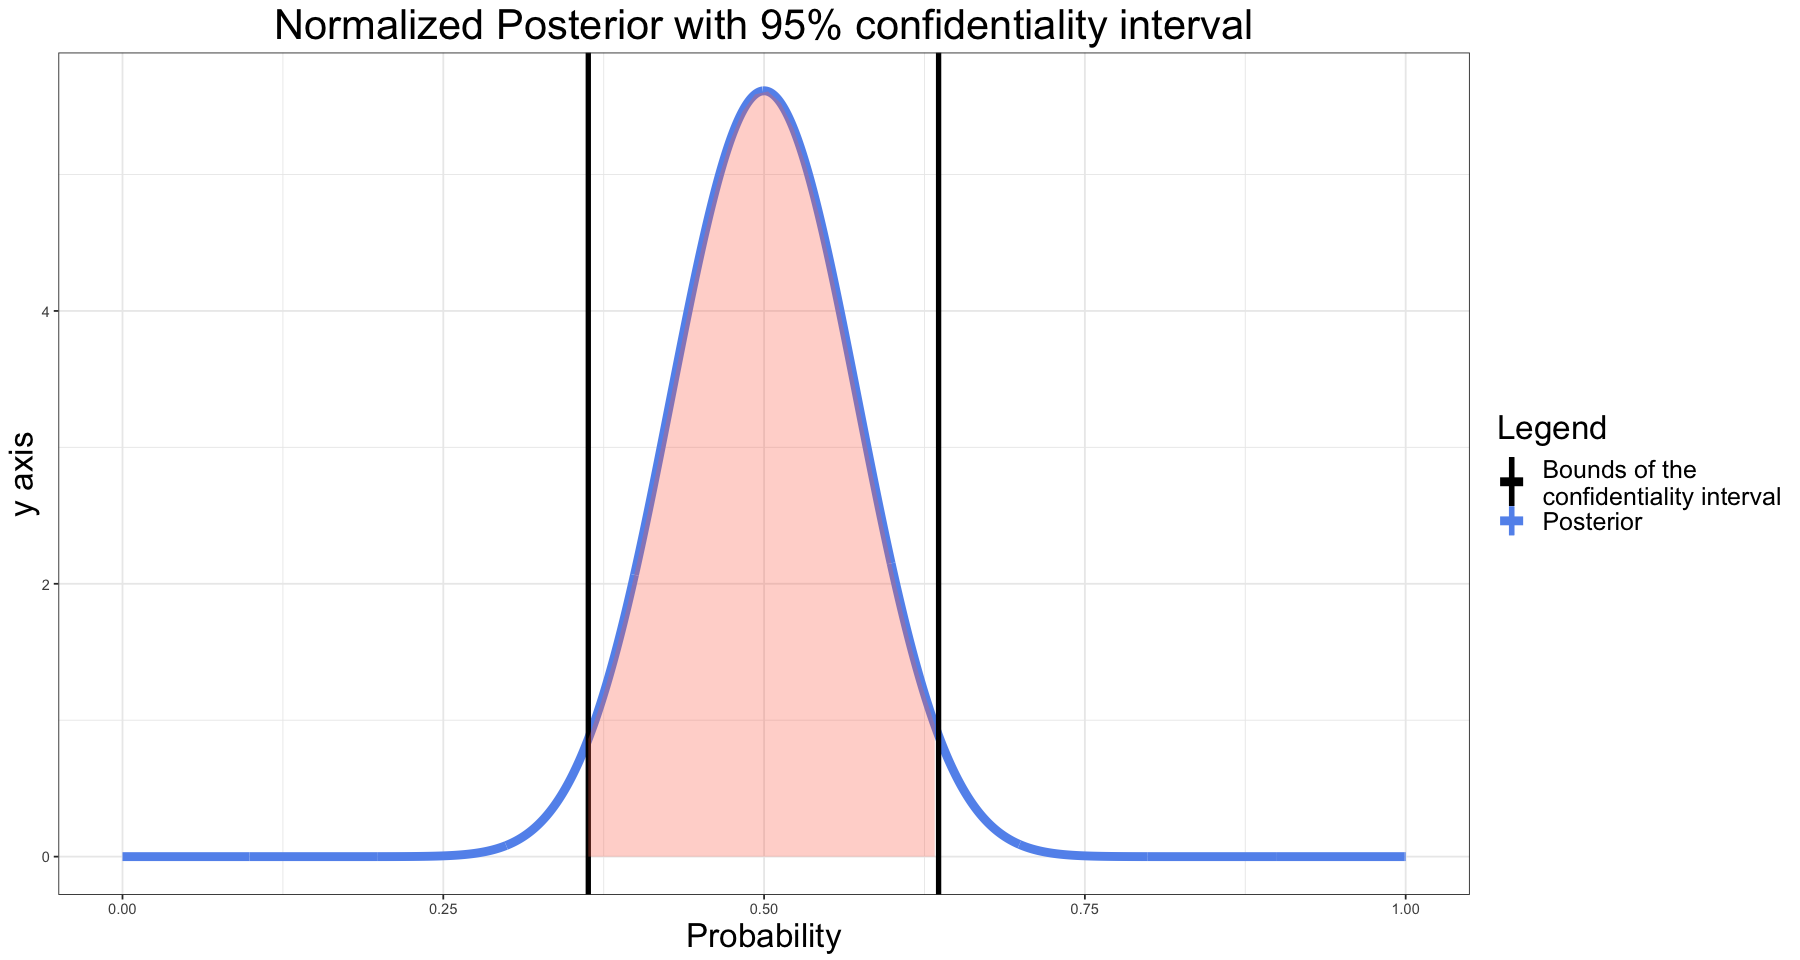

In [49]:
plot <- ggplot() +
#The posterior is still a beta with paramenters a + n and n - r + b
    geom_line(aes(x=probability, y=dbeta(probability, alpha + r, beta + n -r), color='Posterior'), pch=21, lwd=2.5) +
    theme_bw() +
    labs(title='Normalized Posterior with 95% confidentiality interval', x='Probability', y='y axis', color='Legend') +
    theme(plot.title = element_text(size=25, hjust = 0.5)) +
    theme(axis.title = element_text(size=20, hjust = 0.5)) +
    scale_color_manual(values = c('Posterior' = 'cornflowerblue', 'Bounds of the\nconfidentiality interval' ='black')) +
    theme(legend.text = element_text(size=15)) + 
    theme(legend.title = element_text(size=20)) +
    
    geom_vline(aes(xintercept=lower_bound$probability, color='Bounds of the\nconfidentiality interval'), lwd=1.5) +

    geom_vline(aes(xintercept=upper_bound$probability, color='Bounds of the\nconfidentiality interval'), lwd=1.5) +

    
    geom_ribbon(aes(x = seq(lower_bound$probability, upper_bound$probability, by=0.01), ymin=0, ymax=dbeta(seq(lower_bound$probability, upper_bound$probability, by=0.01), alpha + r, beta + n -r)), fill = 'coral1', alpha =0.3)

plot

## Point 3

In [216]:
#Building a dataframe with the number of heads at every extraction
sequence <- 'TTTTTHTTHHTTHHHTHTHTHHTHTHTHHH'
split_sequence <- unlist(strsplit(as.character(sequence),""))

extraction <- data.frame(1, 0)
colnames(extraction) <- c('extraction', 'heads')

head = 0
for(i in 2:(length(split_sequence))){
    if (split_sequence[[i]] == 'T'){
        extraction[i,] <- (c(i, head))
    }
    if (split_sequence[[i]] == 'H'){
        head <- head + 1
        extraction[i,] <- (c(i, head))
    }
    
}
nrow(extraction)

[1] 30

In [217]:
#Uniform prior case

#The data_frame to store all the meaningful values
final_df <- data.frame(matrix(ncol = 4, nrow = 0))
colnames(final_df) <- c('most_probable_value', 'lower_bound', 'upper_bound', 'Extraction number')



for (i in 1:nrow(extraction)){
    n <- extraction$extraction[i]
    r <- extraction$heads[i]
    posterior_unif <- probability^r*(1-probability)^(n-r)
    posterior_func_unif <- function(x){
        return(x^r*(1-x)^(n-r))
    }

    evidence <- integrate(posterior_func_unif, lower=0, upper=1)

    cumul_df <- data.frame(probability[1], (1/evidence$value)*integrate(posterior_func_unif, lower=0, upper=probability[1])$value)
    colnames(cumul_df) <- c('probability', 'cumulative')
    for (j in 2:length(probability)){
        cumul_df[j,] <- c(probability[j], (1/evidence$value)*integrate(posterior_func_unif, lower=0, upper=probability[j])$value)
    }
    

    max_index <- which.max(posterior_unif/(evidence$value))
    max_prob <- probability[max_index]
    #print(lower_bound$probability)
    lower_bound <- cumul_df[cumul_df$cumulative < 0.025,][nrow(cumul_df[cumul_df$cumulative < 0.025,]),]

    upper_bound <- cumul_df[cumul_df$cumulative < 0.975,][nrow(cumul_df[cumul_df$cumulative < 0.975,]),]

    final_df[i,] <- c(max_prob, lower_bound$probability, upper_bound$probability, i) 
    
   
}
head(final_df)


most_probable_value lower_bound upper_bound Extraction number
1 0.000               0.012       0.841       1                
2 0.000               0.008       0.707       2                
3 0.000               0.006       0.602       3                
4 0.000               0.005       0.521       4                
5 0.000               0.004       0.459       5                
6 0.167               0.036       0.578       6

In [222]:
#Plotting the most probable value a the number of ectraction varies
options(repr.plot.width=20, repr.plot.height=10)
final_plotting <- function(dataframe){
        plot_1 <- ggplot() +
                geom_point(aes(x = dataframe$Extraction, y = dataframe$most_probable_value), fill='red', color='black', pch=21, size=4) + 
                theme_bw() +
                labs(title='Most probable value evolution', x='Extraction number', y='Most probable value') +
                theme(plot.title = element_text(size=25)) +
                theme(axis.title = element_text(size=20))

        plot_2 <- ggplot() +
                geom_point(aes(x = dataframe$Extraction, y = dataframe$lower_bound, fill='lower bound'), pch=21, color='black', size=4) +
                geom_point(aes(x = dataframe$Extraction, y = dataframe$upper_bound, fill='upper bound'), pch=21, color='black', size=4) +
                theme_bw() +
                labs(title='Confidentiallity bounds value evolution', x='Extraction number', y='Probability', fill='Legend') +
                theme(plot.title = element_text(size=25)) +
                theme(axis.title = element_text(size=20)) +
                theme(legend.text = element_text(size=15)) + 
                theme(legend.title = element_text(size=20)) 

        return(grid.arrange(plot_1, plot_2, nrow=1,widths = c(0.6, 2/3)))

}

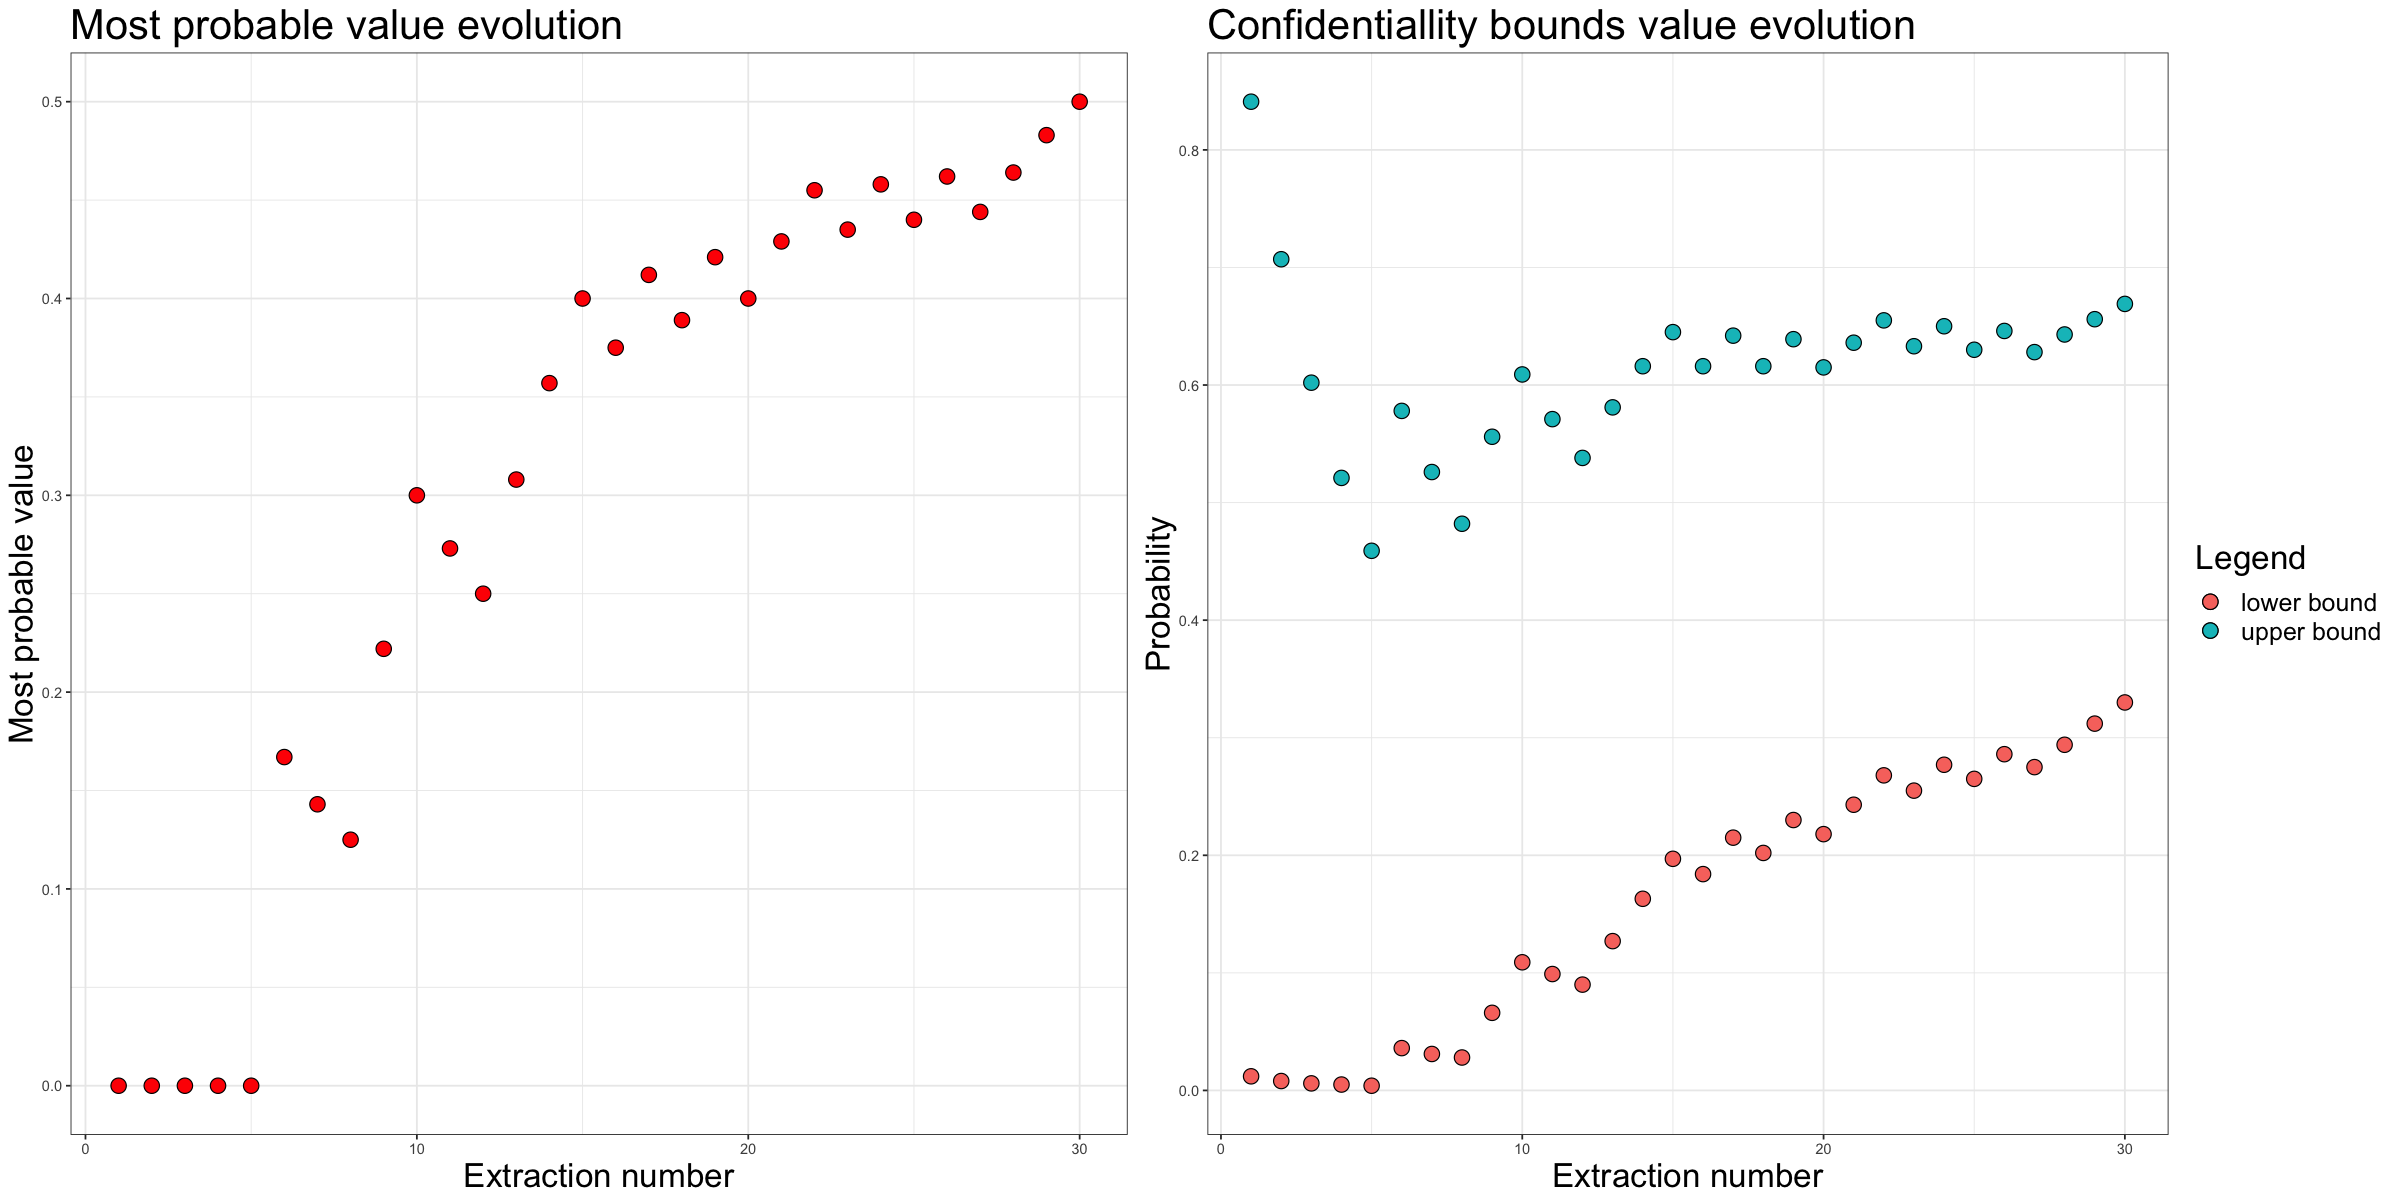

In [223]:
final_plotting(final_df)

In [220]:
#Here we repeat the analysis with a beta prior

#The data_frame to store all the meaningful values
final_df_1 <- data.frame(matrix(ncol = 4, nrow = 0))
colnames(final_df_1) <- c('most_probable_value', 'lower_bound', 'upper_bound', 'Extraction number')


alpha <- 10
beta <- 10
prior <- dbeta(probability, alpha, beta)



for (i in 1:nrow(extraction)){
    n <- extraction$extraction[i]
    r <- extraction$heads[i]

    max_index <- which.max(dbeta(probability, alpha + r, beta + n -r))
    max_prob <- probability[max_index]


    #dataframe with cumulative of the posterior and relative probability
    cumul_df <- data.frame(probability, pbeta(probability, alpha + r, beta + n -r))
    colnames(cumul_df) <- c('probability', 'cumulative')

    upper_bound <- cumul_df[cumul_df$cumulative < 0.975,][nrow(cumul_df[cumul_df$cumulative < 0.975,]),]

    lower_bound <- cumul_df[cumul_df$cumulative < 0.025,][nrow(cumul_df[cumul_df$cumulative < 0.025,]),]

    final_df_1[i,] <- c(max_prob, lower_bound$probability, upper_bound$probability, i)

}

head(final_df)


most_probable_value lower_bound upper_bound Extraction number
1 0.474               0.271       0.684       1                
2 0.450               0.257       0.659       2                
3 0.429               0.243       0.636       3                
4 0.409               0.231       0.614       4                
5 0.391               0.221       0.594       5                
6 0.417               0.244       0.613       6

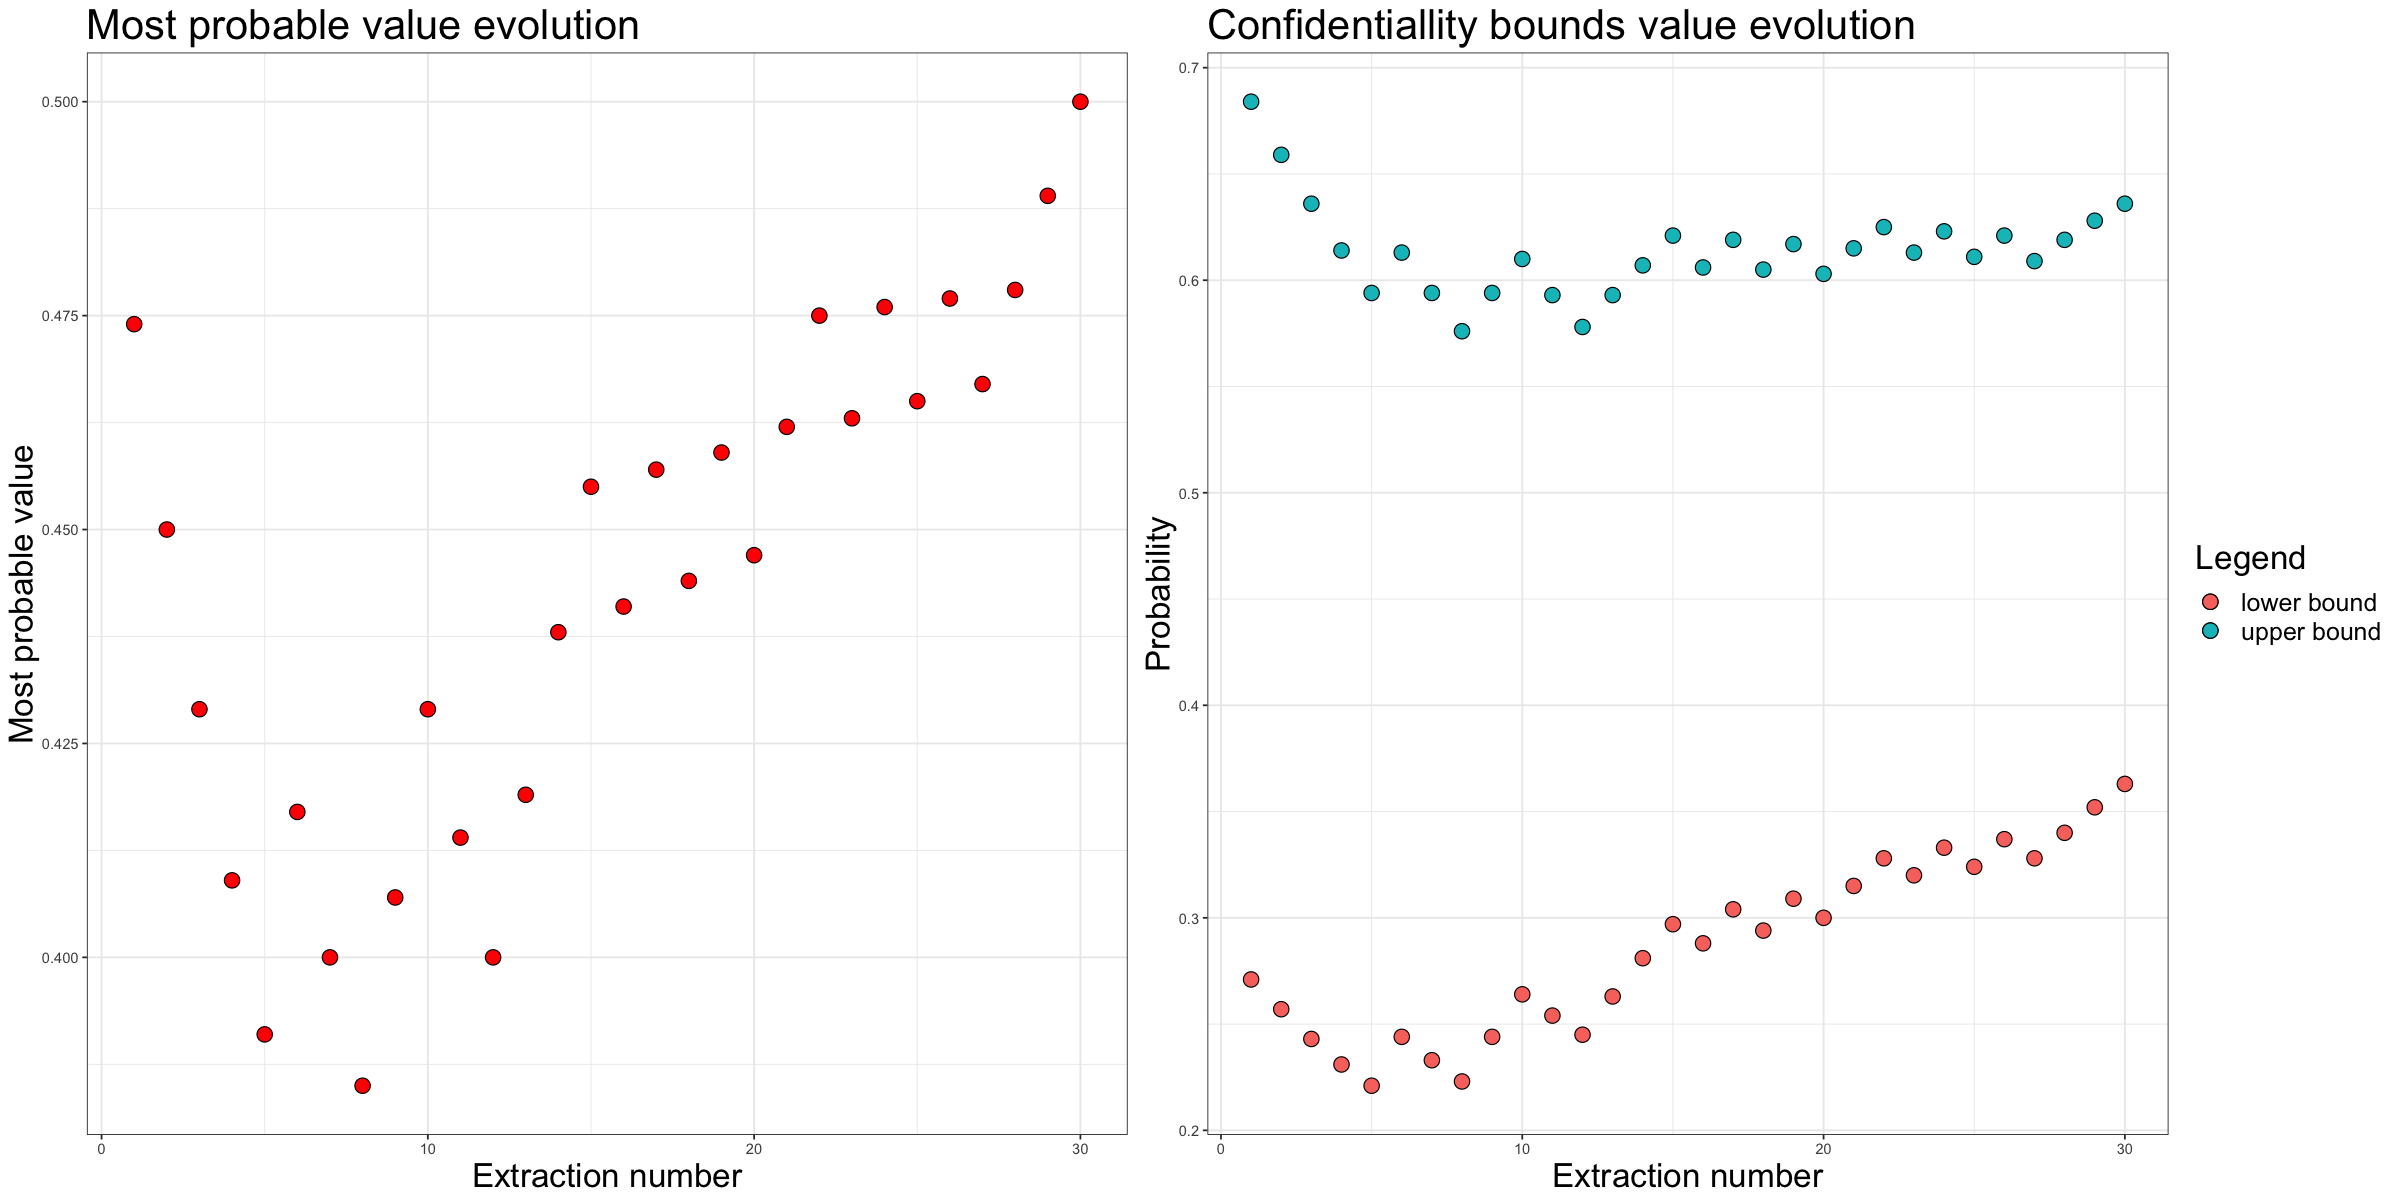

In [224]:
final_plotting(final_df_1)

Analyzing the data sequentially we have that, at the end of the day, at the final draw the results coincide
with the ones obtained considering all the data at once.